<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/fraud_detection%5Cfraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (i.) the data

This dataset is a dataset obtained by kaggle from this link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?sort=votes [3].
This dataset is a dataset on Credit Card Fraud Detection containing transactions of cardholders in Europe over the two days of September 2013. There were 284,807 transactions, of which fraud 492 transactions were about 0.17274856306 percent. This is a huge imbalance. This is why we use f1_score. Instead of accuracy to measure data accuracy because it is suitable for measuring imbalance data. Even if it's only a small amount of fraudulent transactions, it can do a lot of damage. In terms of assets and credibility of this company, this is the main reason that inspired me to do fraud detection. The data security issues make the columns V1, V2, V3,...V28. therefore, converted by PCA(Principal Component Analysis) to numeric form. Therefore, the original data and column name is not known. However, there are data that are not converted by PCA are 'Time', 'Amount' and 'Class' columns. Where Time column is the transaction time in seconds. while Amount column is the amount of money made in the transaction. Finally, the 'Class' column is to show whether it's fraudulent or not, where 1 is fraud and 0 is a normal transaction.

# (ii.) what experiments you are doing with the data

# Abstract

In the past, organizations had only relied on distributed systems and lacked centralization and analysis at a level not higher than baseline in trying to detect and deal with alarms. Makes dealing with issues fraud transaction is a very big problem because the system have big data but there is small fraud transactions make it difficult to verify but can cause enormous damage to businesses. This research use model to therefore addresses the problem of fraud transaction. A total of 10 models were made into 9 machine learning models: Decision Tree, Logistic Regression, Random Forest K-Nearest Neighbor, Support Vector Machine, naive_bayes, XGBoost, Stochastic Gradient Descent, Multilayer perceptron and Deep Learning 1 model is  Convolution Neural Network. The imbalance data is very high, so we need to fix it. In addition, in the dataset, we had to predict more than a human guessed do not fraud transaction at all will have an accuracy of about 99.8272514369 percent, which is a huge challenge, but this research was accomplished with the most accurate model. It was measured with f1-score can 99.9911 percent and a standard deviation of 0.000050 percent, with only 5 transactions from 112032 transactions of test set are wrong prediction. That makes this model very effective and can be used in real situations.

## Introduction

Nowadays, companies that accept credit card payments need to be able to verify whether each transaction is a fraud or not in transaction.  so that customers are not charged for the products they have purchased. However, it is not easy to verify all transactions by human hand. from the survey results It took financial institutions over 40 days to detect fraud. And fraud also affects banks that offer online payment services, with 20 percent of customers changing their banks after fraud issues are encountered[1]. This is why fraud detection with machine learning and deep learning is so important because AI is faster than humans and has less errors. Plus, you don't have to pay for employees to check each transaction. make it check the fraud transactions quickly and accurately. One of the reasons this research is difficult to do is because the number of fraudulent transactions is extremely low. which if the prediction is wrong The confidence of customers with the company will be reduced until they can move to another company. In fact, it is impossible to predict with 100% accuracy. But we should predict more correctly than human guesses. In principle, we think this dataset contains 284,807 transactions, with 492 percent fraudulent transactions. 0.1727485631 percent. If a human guessed that the data was not cheating at all, it would have an accuracy of about 99.8272514369 percent(computed from the total number minus the percentage of fraudulent transactions = 100 -0.1727485631 percent.), which is very accurate. Previous research, including in kaggle, has shown a fairly accurate prediction, with the most common model being the Convolution Neural Network which is a Deep Learning. which uses only one model. it can be seen that other research doesn't use model machine learning. This research therefore explores several models with machine learning. These include Decision Tree, Logistic Regression, Random Forest, K-Nearest Neighbor, Support Vector Machine, naive_bayes, XGBoost, Stochastic Gradient Descent, Multilayer perceptron, and Deep Learning Convolution Neural Network, a total of 10 models.

## IMPORT LIBRARY

We have imported many important libraries such as
*   Library that manages data frames such as pandas to make it easier for us to manage data.
*   Library that handles visualization including seaborn, matplotlib to visualize and analyze more insights.
*   Library that handles delete outlier is LocalOutlierFactor to delete outliers in dataset and make the model more accurate.
*   Library that handles SMOTE, ADASYN is imblearn. over_sampling To tackle Oversample and imbalanced.
*   Library that handles tuning parameters is model_selection to adjust the model more precisely.
*   Library that handles metrics are metrics to measure the accuracy of a model. In this research we used f1_score.
*   Library that handles train model convolution Neural Network, we will use tensorflow. that serves to train deep learning.
*   Library that deal with train machine learning classification model, we will use sklearn that serves to train machine learning.


In [ ]:
# data frame
import pandas as pd
import numpy as np

# vitualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

# skip warning
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings( action= 'ignore')

# delete outlier
from sklearn.neighbors import LocalOutlierFactor


# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from imblearn.over_sampling import ADASYN

# tuning parameter
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV

# train machine learning classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection


# metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline

# train model Convulutional Neural Network
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam


## IMPORT DATASET

The dataset that we use as the dataset that gets the most votes in the kaggle is https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?sort=votes [3]

The dataset in this research does not need to do Data Preprocessing Because it has very clean data with no null values and it is number in all columns and rows.

In [ ]:
# import data
df = pd.read_csv("creditcard.csv")
# Data pre-processing
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploratory Data Analysis

In the study of Exploratory Data Analysis, we can see many insights were obtained as follows.


*   we can see that class 0 is significantly greater than class 1. it can be seen that it is an imbalanced data, requiring f1 score to measure the results of the data.
*   compare class column with every column.
*   we can see an overview of all columns. To detect abnormal columns and see the distribution of data.
*   we see the correlation of all columns. According to the color scale is between [-1,1].
*   we see an outlier where lowest than Quarter1-1.5*(Quarter3-Quarter1) or higher than Quarter3+1.5*(Quarter3-Quarter1) is the outlier that we need to delete.

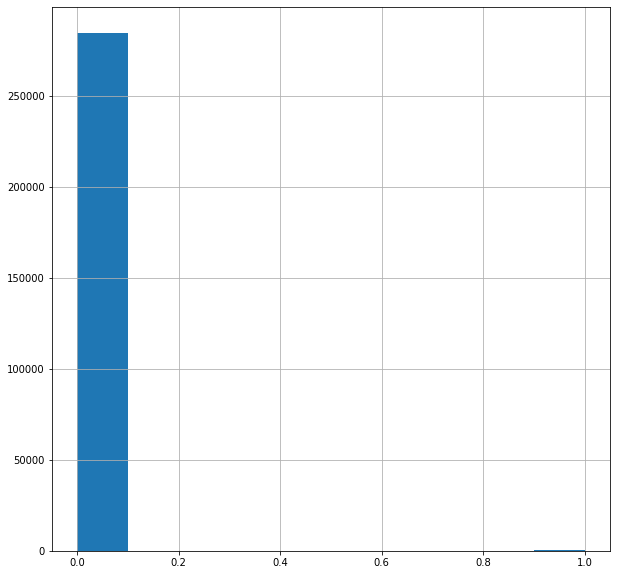

In [ ]:
# we can be seen that class=0 is more than class=1 so much. it is imbalance data we have to choose metric f1 score instead accuracy
df['Class'].hist(figsize = (10,10))
plt.show()  

In [ ]:
# class 0 have 99.82725143693799
# class 1 have 0.00172748563061
# it is imbalance data
print(f'class 0 have = {len(df[df["Class"] == 0])}, it is {len(df[df["Class"] == 0])/(len(df[df["Class"] == 0]) + len(df[df["Class"] == 1]))} percent')
print(f'class 1 have = {len(df[df["Class"] == 1])}, it is {len(df[df["Class"] == 1])/(len(df[df["Class"] == 0]) + len(df[df["Class"] == 1]))} percent')

class 0 have = 284315, it is 0.9982725143693799 percent
class 1 have = 492, it is 0.001727485630620034 percent


<function matplotlib.pyplot.show>

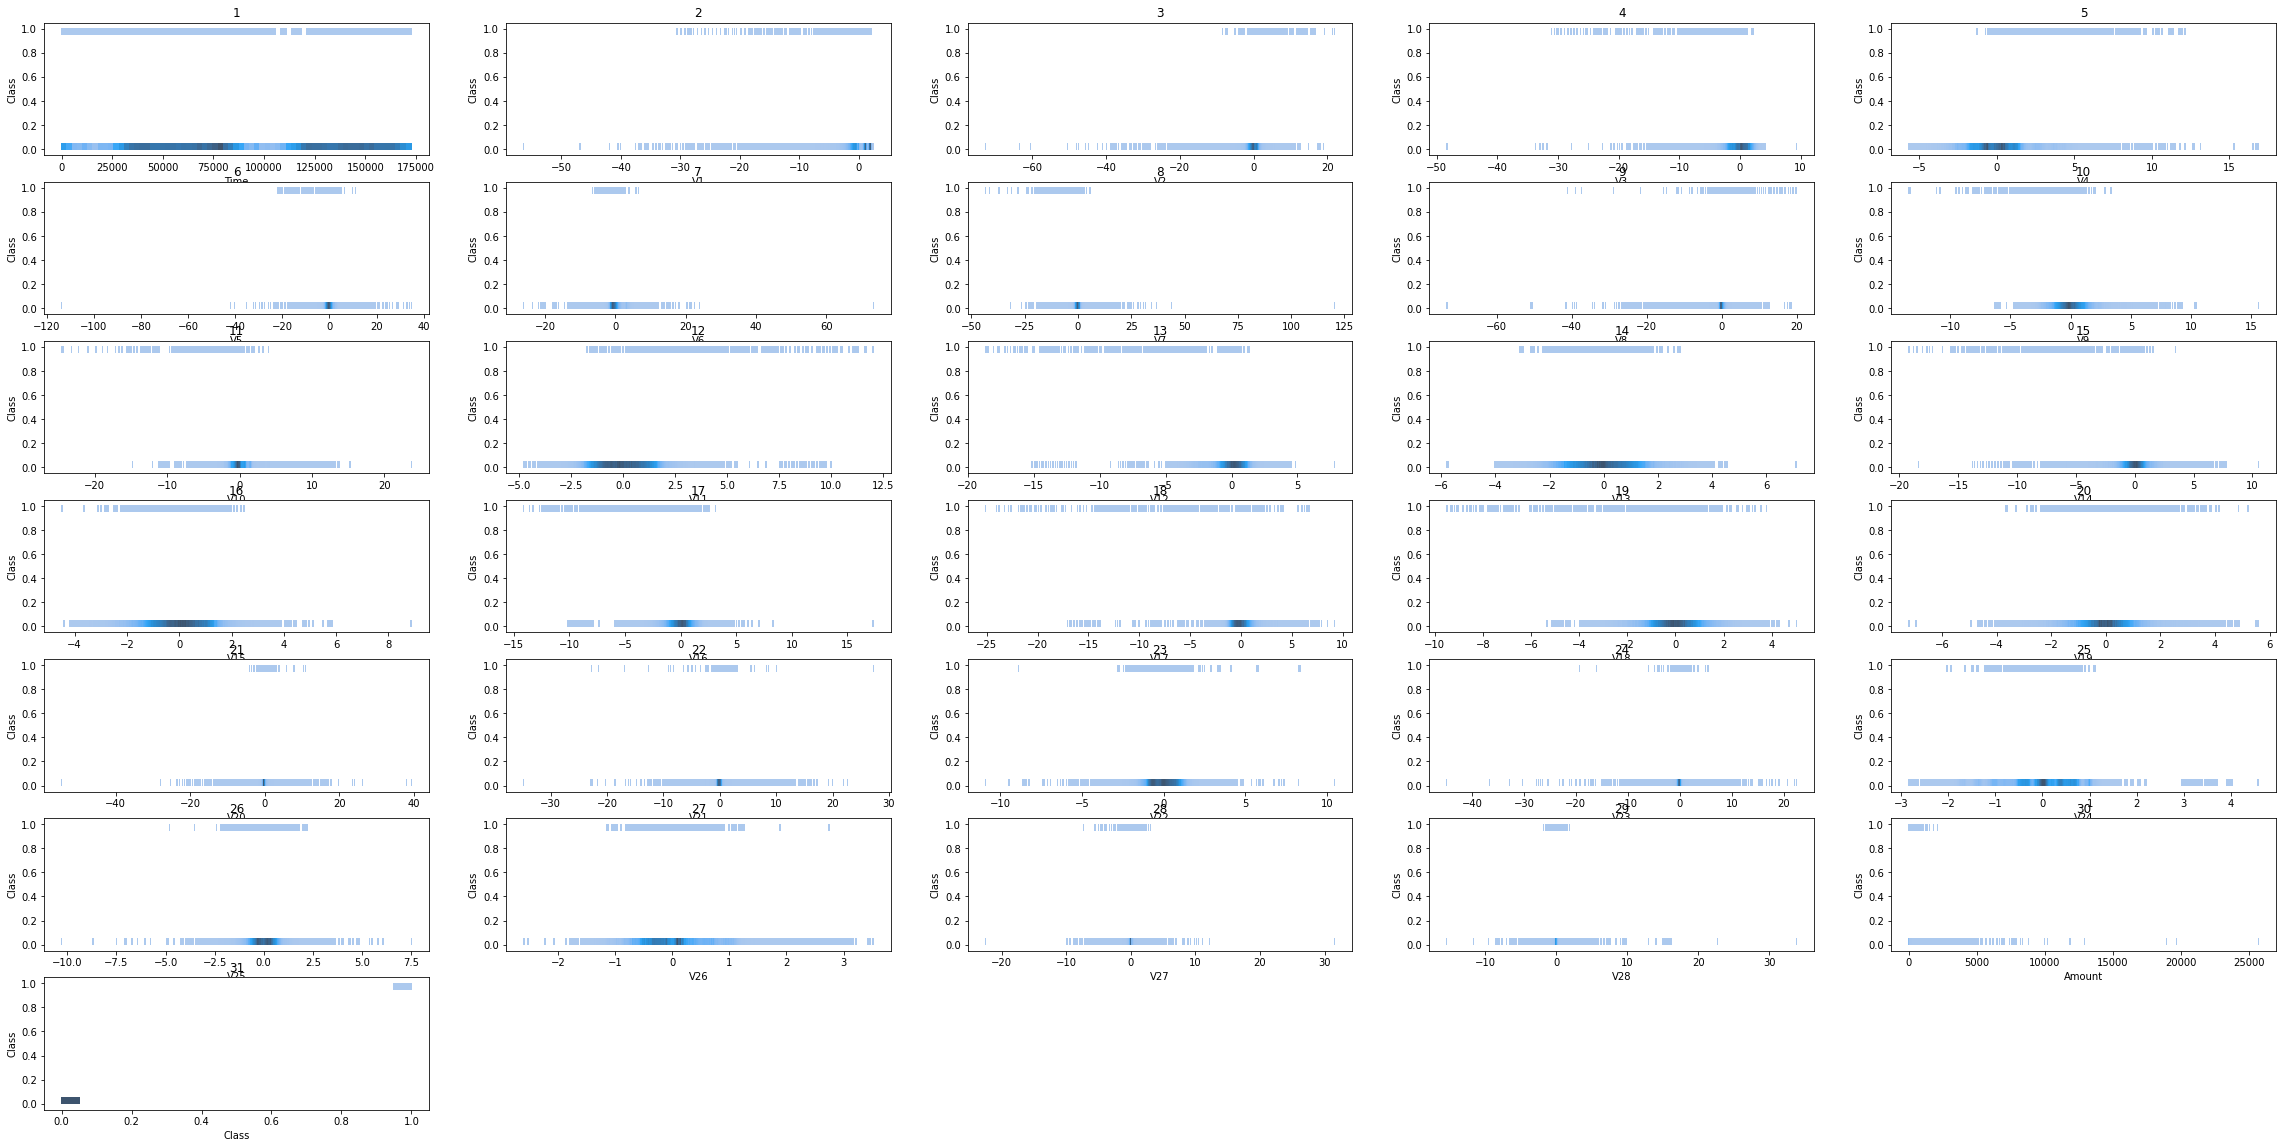

In [ ]:
# compare class column with every column.
plt.figure(figsize=(40,20))

for i, column in enumerate(df.columns):
  plt.subplot(7,5,i+1)
  sns.histplot(x = df[column],y= df['Class'])
  plt.title(i+1)
plt.show

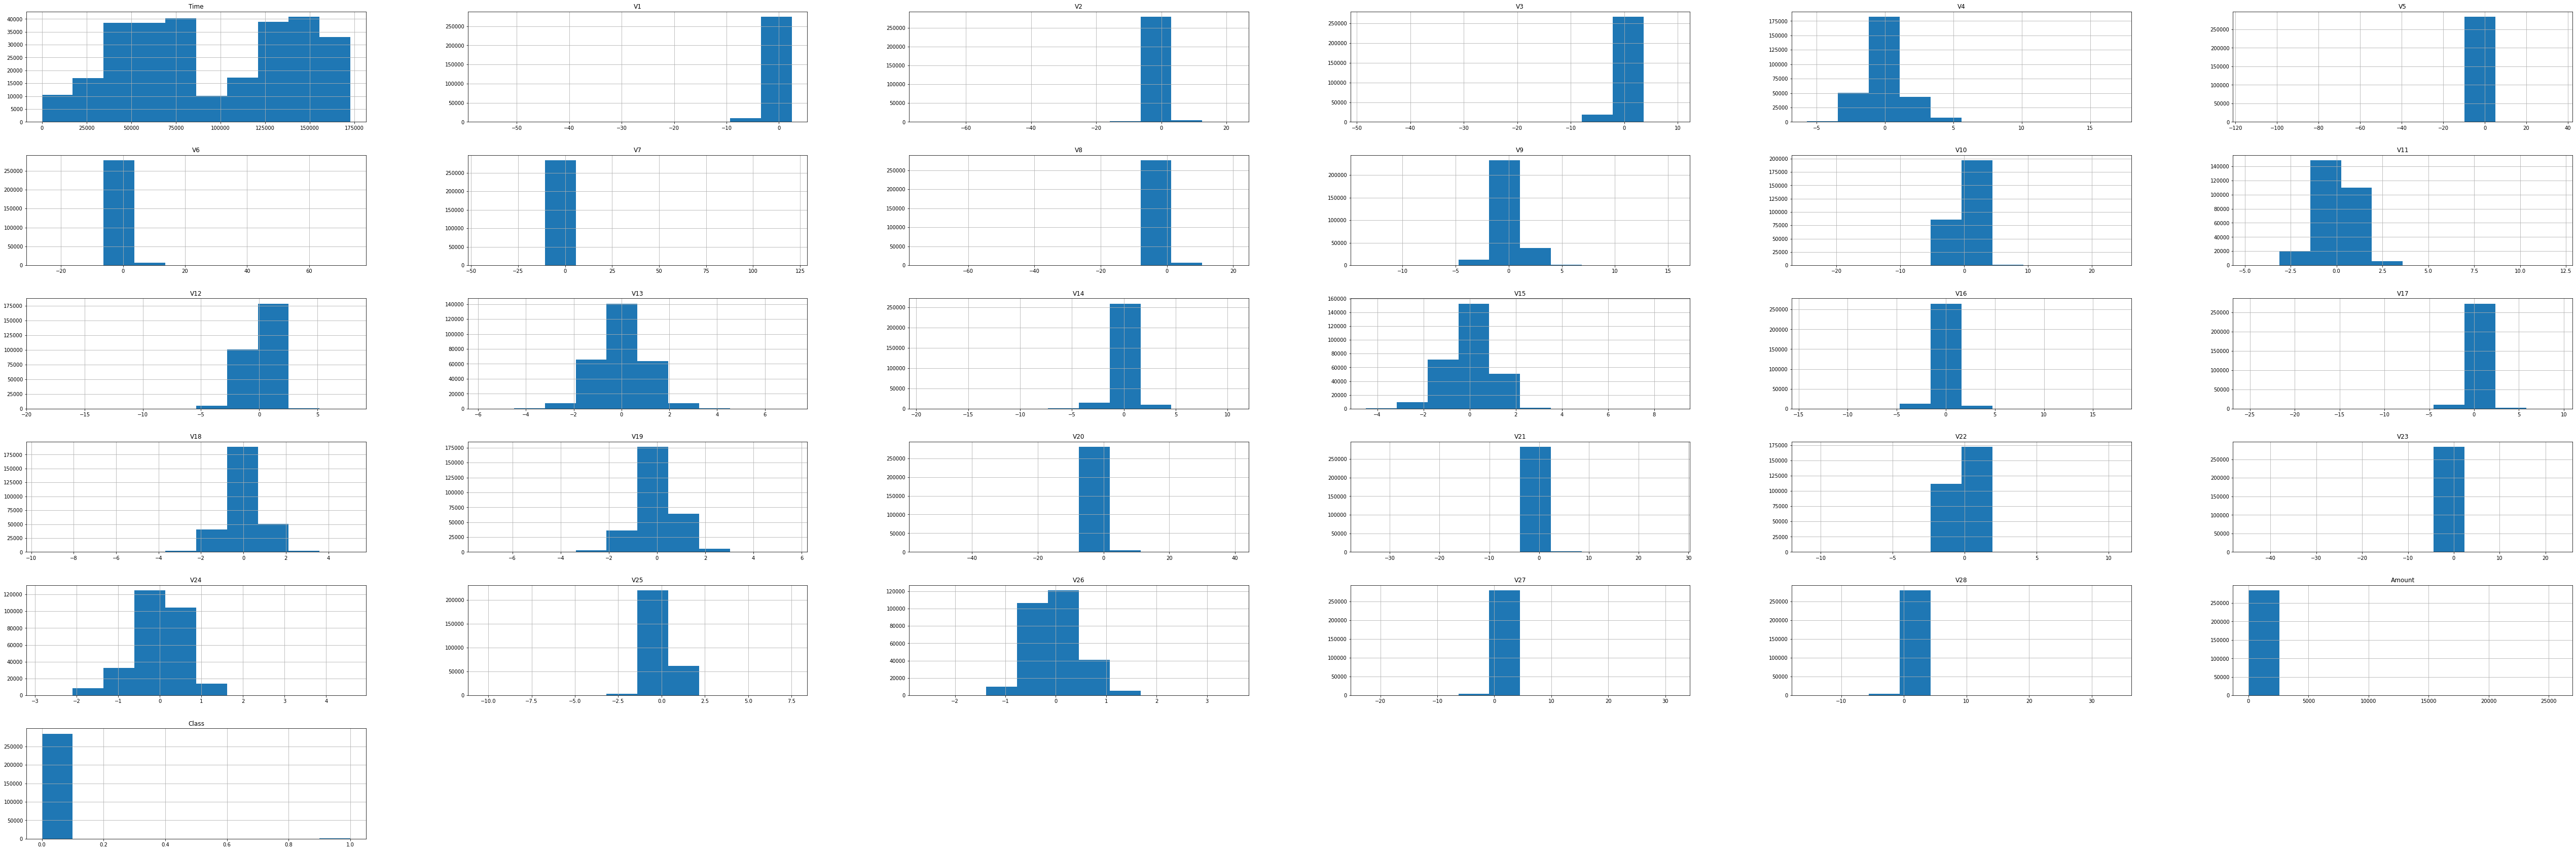

In [ ]:
# we can detect abnormal columns, see the distribution of data, and see an overview of all columns
df.hist(figsize = (90,30))
plt.show()

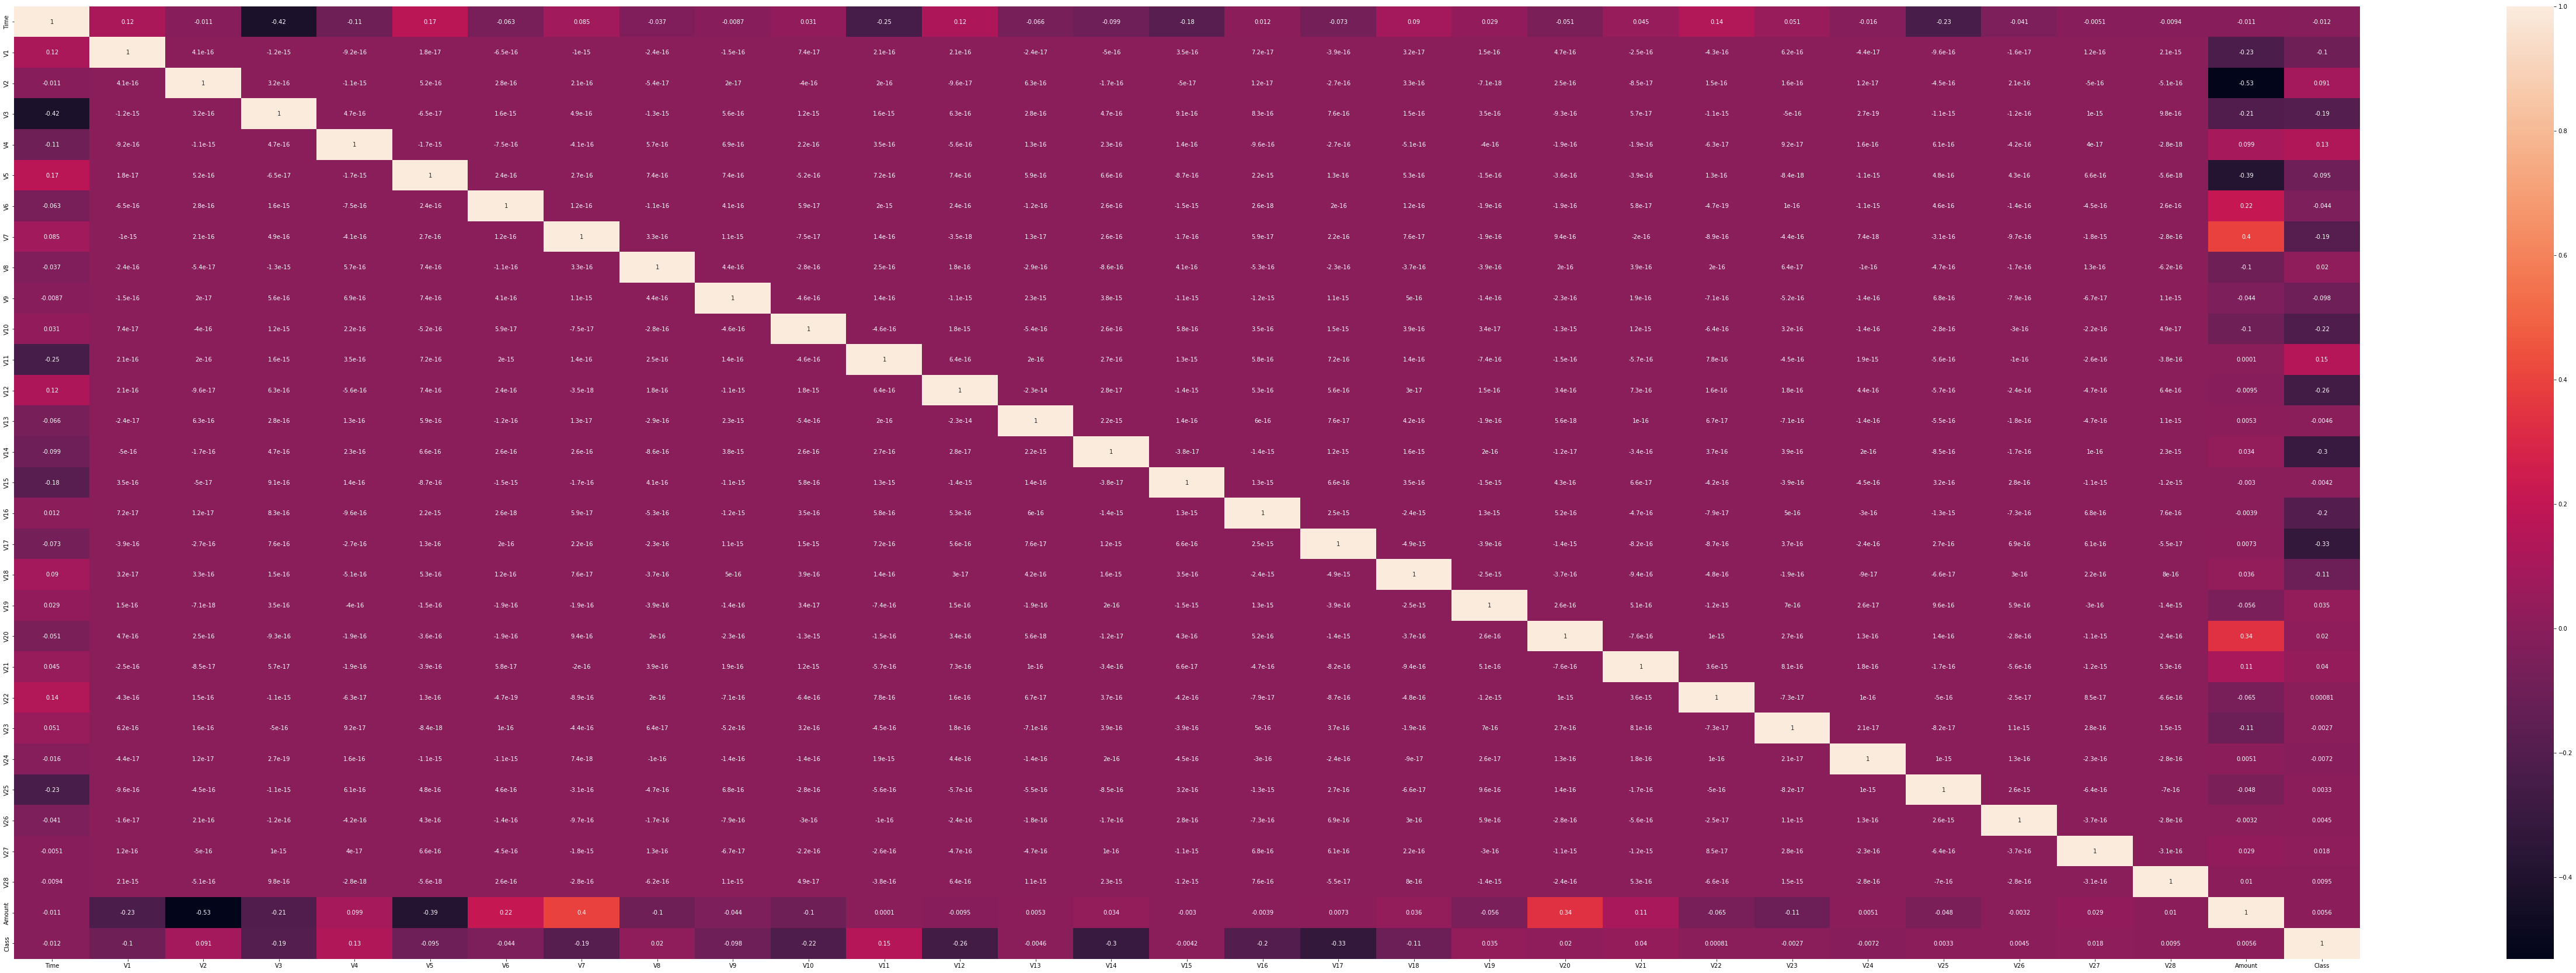

In [ ]:
# we see the correlation of all columns. According to the color scale is between [-1,1].
plt.figure(figsize = (90,30))
data_corr = df.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=df.columns,annot=True)

In [ ]:
# show correlation not relate
corr_columns = data_corr.columns.tolist()
for i in range(len(corr_columns)):
  correlation_columns = data_corr[f'{data_corr.columns[i]}']
  
  for j in range(len(corr_columns)):
    correleation_row = correlation_columns[j]
    if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.8):
    # if (correleation_row < 0.1 and correleation_row > -0.1):
      print(corr_columns[i],corr_columns[j],correleation_row)

In [ ]:
# describe count, mean, standard deviation, min, quarter1, quarter2, quarter3, max value
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


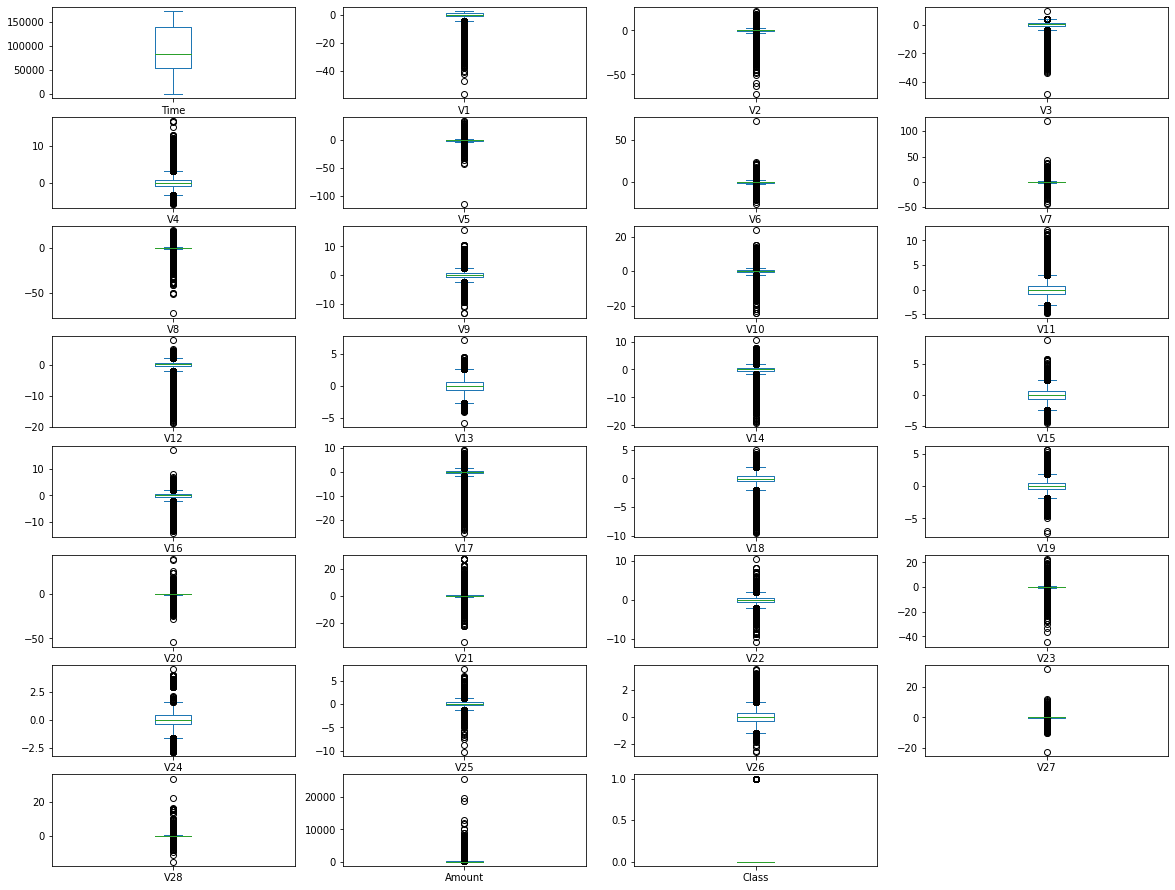

In [ ]:
# plot function same describe function but it is visualization image. We see an outlier where lowest than Quarter1-1.5(Quarter3-Quarter1) or higher than Quarter3+1.5(Quarter3-Quarter1) is the outlier that we need to delete.
df.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

## Feature Engineering

In Exploratory Data Analysis, we can see that there is a lot of outlier data which makes our model less accurate, so we remove the outlier with LocalOutlierFactor() function.

In [ ]:
# use LocalOutlierFactor to delete outlier
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df)
# we predict it is outlier or not?
df['check_outlier'] = predict_outlier.tolist()
# delete record outlier
df = df[df['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
3,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
4,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280496,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
280497,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
280498,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
280499,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0


In [ ]:
# Remaining number of class=0 and class=1
print(f'class 0 have = {len(df[df["Class"] == 0])}, it is {len(df[df["Class"] == 0])/(len(df[df["Class"] == 0]) + len(df[df["Class"] == 1]))} percent')
print(f'class 1 have = {len(df[df["Class"] == 1])}, it is {len(df[df["Class"] == 1])/(len(df[df["Class"] == 0]) + len(df[df["Class"] == 1]))} percent')

class 0 have = 280108, it is 0.9985989354761658 percent
class 1 have = 393, it is 0.0014010645238341397 percent


## train_test_split

To divide the data, we will first distinguish between feature and label. All except the 'Class' column act as a feature. acting like the input that predicts the model and labels are the correct answers. that uses 'Class' column

In [ ]:
features = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
# use all column except 'Class' column act as a feature
X = df.loc[:, features].to_numpy()
# use 'Class' column act as a label
y = df.loc[:, 'Class'].to_numpy()
print(X.shape, y.shape)


(280501, 30) (280501,)


After we divide the feature and the label, the next step of the imbalance data is to use adaptive synthetic as a sampling technique. Special random add Rather than randomly adding the same data, it synthesizes close of the data. new data from existing data will be randomly selected to have the closest number or equal to the amount of data in most classes In the process of generating artificial data (Synthetic data), it is not necessary to consider every data in the minority group, it uses the weight distribution of the sample data in the minority group. By creating a pseudo-data that depends on the importance of that data, if any data is difficult to segment, it gives a lot of weight to that data and creates an pseudo-dataset in that region, thereby adjusting the boundaries of decision-making in grouping improved.

it delete imbalance dataset problem

Counter({0: 280108, 1: 393})
Counter({0: 280108, 1: 280052})


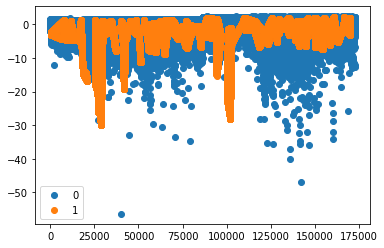

In [ ]:
# check count of label
y_counter = Counter(y)
print(y_counter)
# fix imbalance dataset
over_sample = ADASYN()
X, y = over_sample.fit_resample(X, y)
# check count of label and we can see The numbers class=0 and class=1 are almost the same count.
y_counter = Counter(y)
print(y_counter)
# visualization fix imbalance dataset
for label, _ in y_counter.items():
	row = where(y == label)[0]
	pyplot.scatter(X[row, 0], X[row, 1], label=str(label))
pyplot.legend()
pyplot.show()

After that, the data will be divided into Train and Test. Train is the data set to teach to the model, and Test is the data set that is divided from the Data set to test the accuracy and correctness of the model that has been trained This research will divide the data in proportion of Train 80 percent, Test 20 percent of all data.

In [ ]:
# train test split. train is 80 percent of dataset and test is 20 percent of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((448128, 30), (112032, 30), (448128,), (112032,))

In [ ]:
y_train

## Machine Learning Classification

In the machine learning model we have 9 models namely Decision Tree, Logistic Regression, Random Forest K-Nearest Neighbor, Support Vector Machine, naive_bayes, XGBoost, Stochastic Gradient Descent, Multilayer perceptron, so I'll do for loop in each step and compare the model.

### Train multiple model with default parameter

train the model we will do the following:


*   We will train 9 model machine learning models: Decision Tree, Logistic Regression, Random Forest K-Nearest Neighbor, Support Vector Machine, naive_bayes, XGBoost, Stochastic Gradient Descent, Multilayer perceptron.
*   Each model uses 3 scalar: standard scalar, min max scalar, robust scalar. 
*   In this step, the parameters of every model will be the default parameter.
*   We will use the K-Fold Cross Validation (kfold cv) technique which allows the data to be distributed evenly to create and test the model. after we calculate and know the f1 score 10 fold. we calculate the average and standard deviation f1 score 10 fold.
*   evaluate the efficiency of all models where tp is the correct predicted data same to the answer. fp is the information contained in the solution but not in the prediction. fn is the predicted data incorrectly same answer. Precision is the accuracy value caused by comparing the tp value with fp. Recall is the accuracy value. Caused by comparing tp value with fn, F1 Score is the mean of Precision and Recall. We can combine precision,recall and f1_score can be combined with a single command classification_report
*   plot_confusion_matrix function to visualize the confusion matrix
*   compare the model's mean and standard deviation using a dataframe and barplot to measure average and standard Deviation of f1 score in each model and each scalar.




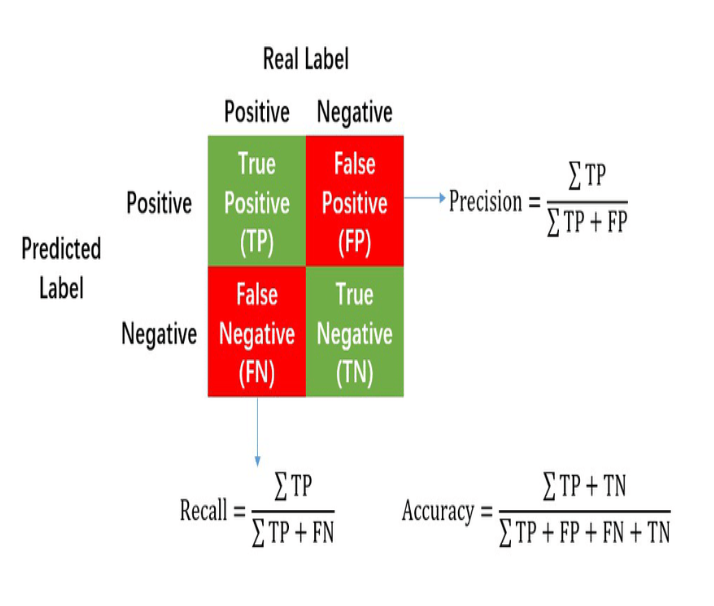

scalar =  StandardScaler() name = DecisionTreeClassifier model = DecisionTreeClassifier()
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_DecisionTreeClassifier: 0.9985447078255436


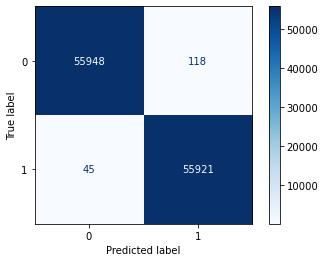

scalar =  StandardScaler() name = LogisticRegression model = LogisticRegression()
LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     56066
           1       0.99      0.96      0.98     55966

    accuracy                           0.98    112032
   macro avg       0.98      0.98      0.98    112032
weighted avg       0.98      0.98      0.98    112032

f1_score_LogisticRegression: 0.975844534882667


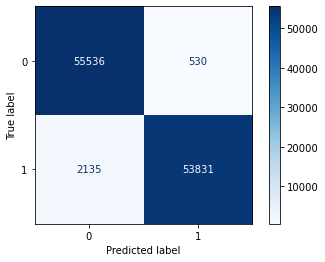

scalar =  StandardScaler() name = RandomForestClassifier model = RandomForestClassifier()
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_RandomForestClassifier: 0.9999463988993907


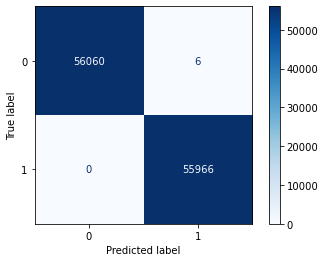

scalar =  StandardScaler() name = KNeighborsClassifier model = KNeighborsClassifier()
KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_KNeighborsClassifier: 0.9992233460395111


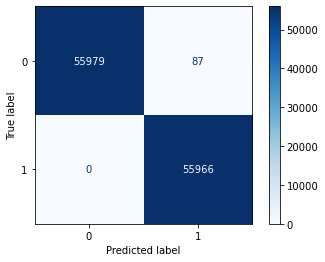

scalar =  StandardScaler() name = SVC model = SVC()
SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_SVC: 0.9971569574080035


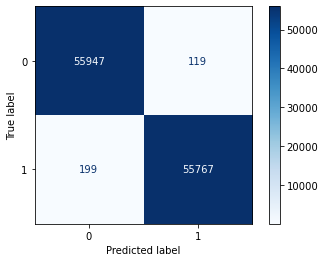

scalar =  StandardScaler() name = GaussianNB model = GaussianNB()
GaussianNB
              precision    recall  f1-score   support

           0       0.86      0.97      0.92     56066
           1       0.97      0.85      0.90     55966

    accuracy                           0.91    112032
   macro avg       0.92      0.91      0.91    112032
weighted avg       0.92      0.91      0.91    112032

f1_score_GaussianNB: 0.9036397262102233


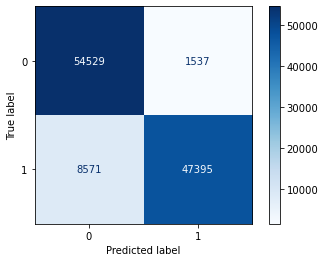

scalar =  StandardScaler() name = XGBClassifier model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy             

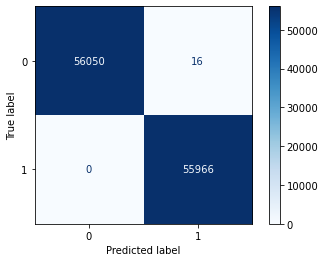

scalar =  StandardScaler() name = SGDClassifier model = SGDClassifier()
SGDClassifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     56066
           1       0.99      0.96      0.98     55966

    accuracy                           0.98    112032
   macro avg       0.98      0.98      0.98    112032
weighted avg       0.98      0.98      0.98    112032

f1_score_SGDClassifier: 0.9752558951329927


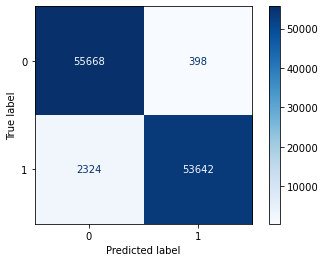

scalar =  StandardScaler() name = MLPClassifier model = MLPClassifier()
MLPClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_MLPClassifier: 0.9997588402897489


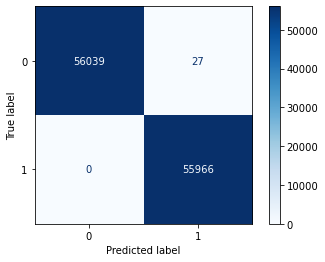

scalar =  RobustScaler() name = DecisionTreeClassifier model = DecisionTreeClassifier()
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_DecisionTreeClassifier: 0.9986516773669313


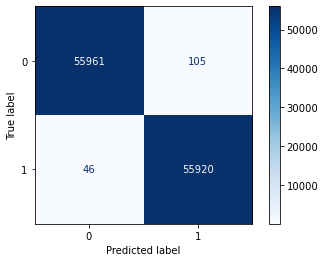

scalar =  RobustScaler() name = LogisticRegression model = LogisticRegression()
LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     56066
           1       0.99      0.96      0.98     55966

    accuracy                           0.98    112032
   macro avg       0.98      0.98      0.98    112032
weighted avg       0.98      0.98      0.98    112032

f1_score_LogisticRegression: 0.9753280078341056


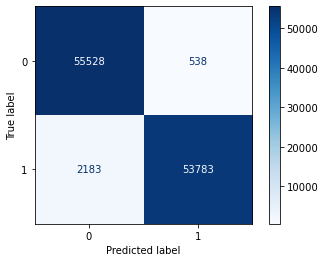

scalar =  RobustScaler() name = RandomForestClassifier model = RandomForestClassifier()
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_RandomForestClassifier: 0.9999553320171167


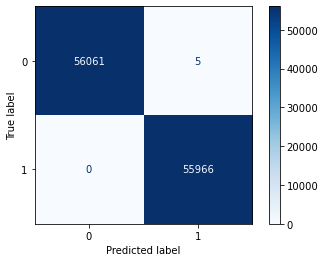

scalar =  RobustScaler() name = KNeighborsClassifier model = KNeighborsClassifier()
KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_KNeighborsClassifier: 0.9989112392239455


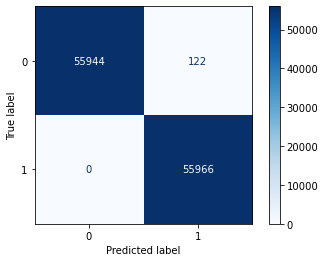

scalar =  RobustScaler() name = SVC model = SVC()
SVC
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56066
           1       1.00      0.99      0.99     55966

    accuracy                           0.99    112032
   macro avg       0.99      0.99      0.99    112032
weighted avg       0.99      0.99      0.99    112032

f1_score_SVC: 0.9927825056554993


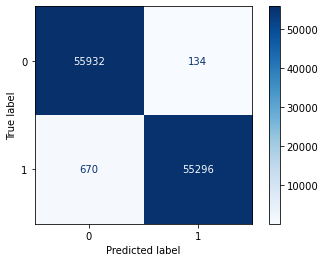

scalar =  RobustScaler() name = GaussianNB model = GaussianNB()
GaussianNB
              precision    recall  f1-score   support

           0       0.86      0.97      0.92     56066
           1       0.97      0.85      0.90     55966

    accuracy                           0.91    112032
   macro avg       0.92      0.91      0.91    112032
weighted avg       0.92      0.91      0.91    112032

f1_score_GaussianNB: 0.9036397262102233


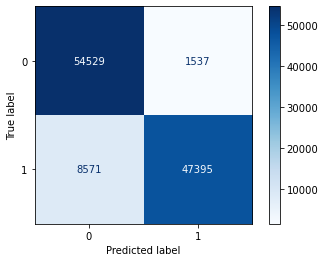

scalar =  RobustScaler() name = XGBClassifier model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg   

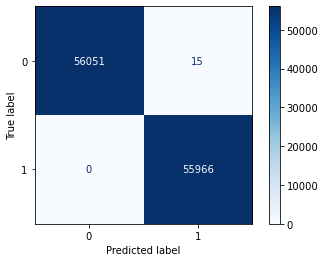

scalar =  RobustScaler() name = SGDClassifier model = SGDClassifier()
SGDClassifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     56066
           1       0.99      0.96      0.97     55966

    accuracy                           0.97    112032
   macro avg       0.97      0.97      0.97    112032
weighted avg       0.97      0.97      0.97    112032

f1_score_SGDClassifier: 0.973937846897341


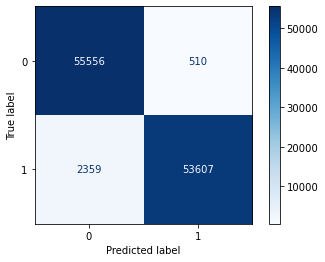

scalar =  RobustScaler() name = MLPClassifier model = MLPClassifier()
MLPClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_MLPClassifier: 0.9998481451375181


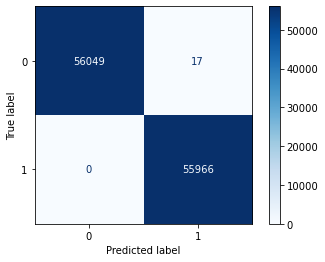

scalar =  MinMaxScaler() name = DecisionTreeClassifier model = DecisionTreeClassifier()
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_DecisionTreeClassifier: 0.9984824138546687


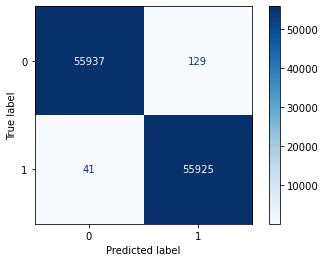

scalar =  MinMaxScaler() name = LogisticRegression model = LogisticRegression()
LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56066
           1       0.99      0.95      0.97     55966

    accuracy                           0.97    112032
   macro avg       0.97      0.97      0.97    112032
weighted avg       0.97      0.97      0.97    112032

f1_score_LogisticRegression: 0.9709158415841583


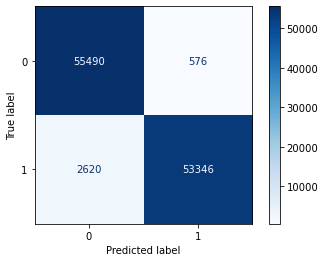

scalar =  MinMaxScaler() name = RandomForestClassifier model = RandomForestClassifier()
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_RandomForestClassifier: 0.9999463988993907


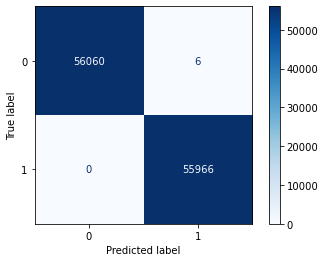

scalar =  MinMaxScaler() name = KNeighborsClassifier model = KNeighborsClassifier()
KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_KNeighborsClassifier: 0.9994820966157693


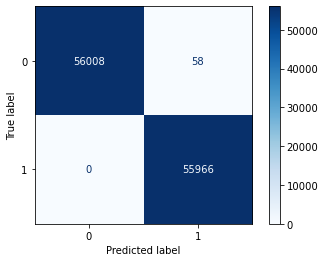

scalar =  MinMaxScaler() name = SVC model = SVC()
SVC
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56066
           1       1.00      0.98      0.99     55966

    accuracy                           0.99    112032
   macro avg       0.99      0.99      0.99    112032
weighted avg       0.99      0.99      0.99    112032

f1_score_SVC: 0.9865388427369217


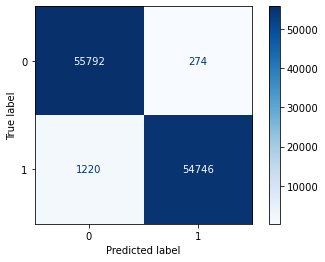

scalar =  MinMaxScaler() name = GaussianNB model = GaussianNB()
GaussianNB
              precision    recall  f1-score   support

           0       0.86      0.97      0.92     56066
           1       0.97      0.85      0.90     55966

    accuracy                           0.91    112032
   macro avg       0.92      0.91      0.91    112032
weighted avg       0.92      0.91      0.91    112032

f1_score_GaussianNB: 0.9036397262102233


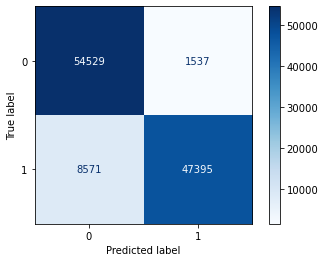

scalar =  MinMaxScaler() name = XGBClassifier model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg   

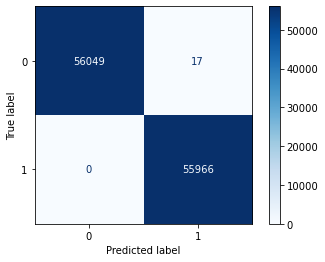

scalar =  MinMaxScaler() name = SGDClassifier model = SGDClassifier()
SGDClassifier
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     56066
           1       0.99      0.94      0.96     55966

    accuracy                           0.96    112032
   macro avg       0.97      0.96      0.96    112032
weighted avg       0.97      0.96      0.96    112032

f1_score_SGDClassifier: 0.9626083200852776


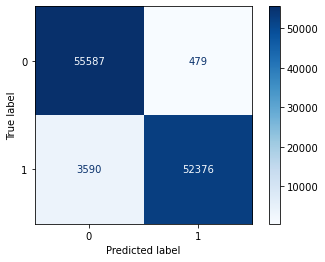

scalar =  MinMaxScaler() name = MLPClassifier model = MLPClassifier()
MLPClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_MLPClassifier: 0.99862539274493


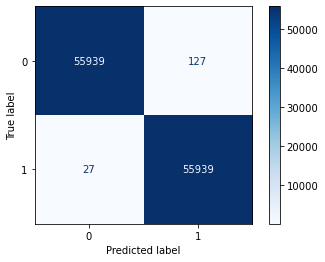

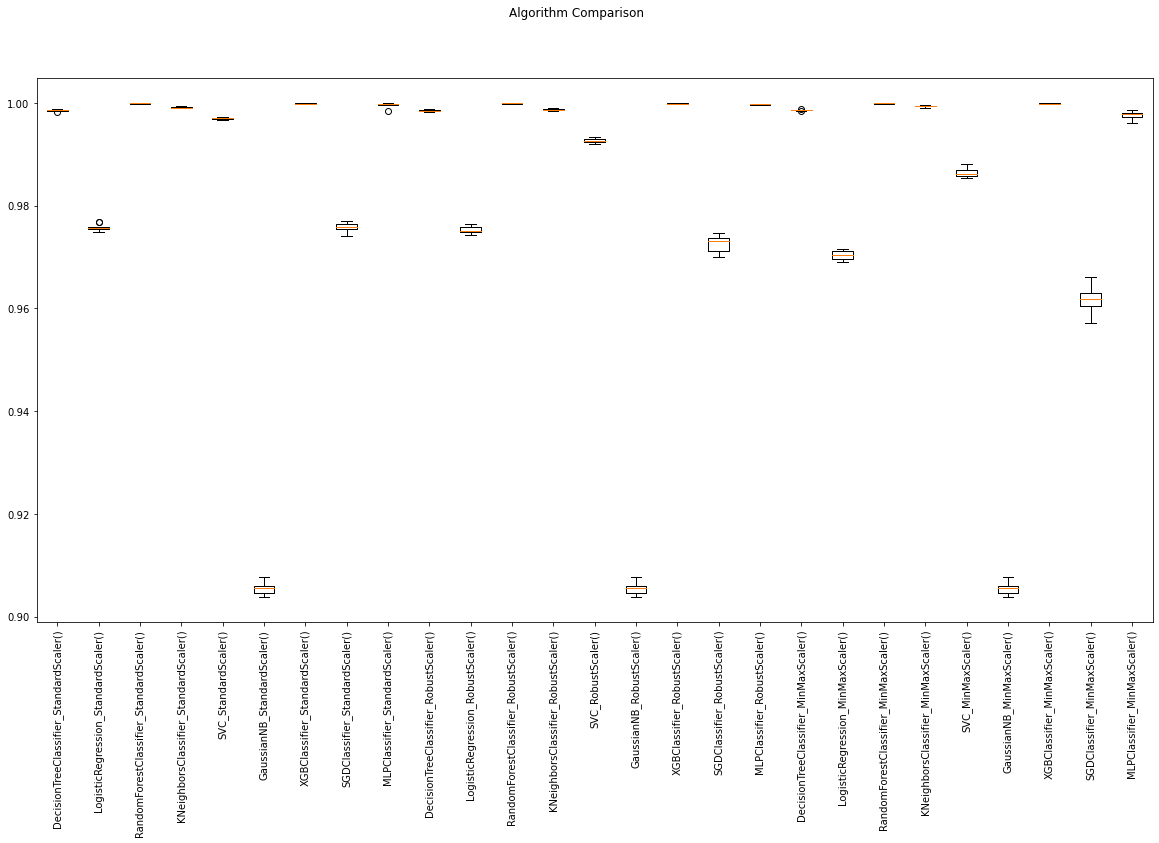

,name_model,name_scalar,mean_score_model,std_score_model,f1_score
2,RandomForestClassifier,StandardScaler(),0.999895,0.000046,0.999946
20,RandomForestClassifier,MinMaxScaler(),0.999889,0.000048,0.999946
11,RandomForestClassifier,RobustScaler(),0.999886,0.000039,0.999955
15,XGBClassifier,RobustScaler(),0.999842,0.000062,0.999866
6,XGBClassifier,StandardScaler(),0.999842,0.000062,0.999857
24,XGBClassifier,MinMaxScaler(),0.999826,0.000067,0.999848
17,MLPClassifier,RobustScaler(),0.999730,0.000087,0.999848
8,MLPClassifier,StandardScaler(),0.999617,0.000398,0.999759
21,KNeighborsClassifier,MinMaxScaler(),0.999364,0.000139,0.999482
3,KNeighborsClassifier,StandardScaler(),0.999070,0.000131,0.999223


In [ ]:
# Min max is used when we want to scale all the columns between same value like -1,1
# Standard scaler takes mean as 0 and then scale all the data according to  the unit variance.
# Robust will first remove outliers

from sklearn.pipeline import Pipeline

# In training a machine learning model, the problem that we often face is the distribution of data.
# we can use standard_scaler,robust_scaler,min_max_scaler to fix this problem
list_scalar = []
list_scalar.append(StandardScaler())
list_scalar.append(RobustScaler())
list_scalar.append(MinMaxScaler())

# we use machine learning 9 models to predict data
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('GaussianNB', GaussianNB()))
models.append(('XGBClassifier', XGBClassifier()))
models.append(('SGDClassifier', SGDClassifier()))
models.append(('MLPClassifier', MLPClassifier()))

all_name_model = []
all_mean_score = []
all_std_score = []
# evaluate each model in turn
results = []
names = []
name_scalar = []
name_plot = []
list_temp_f1_score = []
for i in range(len(list_scalar)):
  for name, model in models:
    print('scalar = ',list_scalar[i] ,'name =',name, 'model =', model)
    # we use pipeline to combine scalar and model
    pipe = Pipeline([('scaler', list_scalar[i]), ('clf', model)])
    name_scalar.append(list_scalar[i])
    name_plot.append(f"{name}_{list_scalar[i]}")
    # we use kfold technique which allows the data to be distributed evenly to 
    # create and test the model. after we calculate and know the f1 score 10 fold.
    #  we calculate the average and standard deviation f1 score 10 fold.
    kfold = model_selection.KFold(n_splits=10)
    # use f1 score to measure data because it is imbalance data problem
    cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1")
    pipe.fit(X_train, y_train)
    # predict y value
    y_pred_model =pipe.predict(X_test)
    results.append(cv_results)
    names.append(name)
    all_name_model.append(name)
    # cross validation mean score
    all_mean_score.append(cv_results.mean())
    # cross validation std score
    all_std_score.append(cv_results.std())
    print(name)
    # classification_report
    print(classification_report(y_test, y_pred_model))
    # accuracy score
    print(f'f1_score_{name}:',f1_score(y_test, y_pred_model))
    list_temp_f1_score.append(f1_score(y_test, y_pred_model))
    # confusion_matrix
    plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
    plt.show()
# boxplot algorithm comparison
fig = plt.figure(figsize = (20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name_plot, rotation=90)
# plt.figure(figsize = (90,30))
plt.show()
# data frame comparison
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'name_scalar': name_scalar,
    'mean_score_model' : all_mean_score,
    'std_score_model' : all_std_score,
    'f1_score':list_temp_f1_score
})
# sort average score model column to easy to see. which model is the best.
df_sort = df_origin_predict.sort_values(by=['mean_score_model'],ascending=False)
display(df_sort)


In [ ]:
df_sort.head(50)

,name_model,name_scalar,mean_score_model,std_score_model,f1_score
2,RandomForestClassifier,StandardScaler(),0.999895,0.000046,0.999946
20,RandomForestClassifier,MinMaxScaler(),0.999889,0.000048,0.999946
11,RandomForestClassifier,RobustScaler(),0.999886,0.000039,0.999955
15,XGBClassifier,RobustScaler(),0.999842,0.000062,0.999866
6,XGBClassifier,StandardScaler(),0.999842,0.000062,0.999857
24,XGBClassifier,MinMaxScaler(),0.999826,0.000067,0.999848
17,MLPClassifier,RobustScaler(),0.999730,0.000087,0.999848
8,MLPClassifier,StandardScaler(),0.999617,0.000398,0.999759
21,KNeighborsClassifier,MinMaxScaler(),0.999364,0.000139,0.999482
3,KNeighborsClassifier,StandardScaler(),0.999070,0.000131,0.999223


In [ ]:
# add full name column for unique model and scalar
df_sort['full_name'] = df_sort['name_model'].map(lambda x: str(x) + '_') + df_sort['name_scalar'].map(lambda x: str(x))
df_sort

,name_model,name_scalar,mean_score_model,std_score_model,f1_score,full_name
2,RandomForestClassifier,StandardScaler(),0.999895,0.000046,0.999946,RandomForestClassifier_StandardScaler()
20,RandomForestClassifier,MinMaxScaler(),0.999889,0.000048,0.999946,RandomForestClassifier_MinMaxScaler()
11,RandomForestClassifier,RobustScaler(),0.999886,0.000039,0.999955,RandomForestClassifier_RobustScaler()
15,XGBClassifier,RobustScaler(),0.999842,0.000062,0.999866,XGBClassifier_RobustScaler()
6,XGBClassifier,StandardScaler(),0.999842,0.000062,0.999857,XGBClassifier_StandardScaler()
24,XGBClassifier,MinMaxScaler(),0.999826,0.000067,0.999848,XGBClassifier_MinMaxScaler()
17,MLPClassifier,RobustScaler(),0.999730,0.000087,0.999848,MLPClassifier_RobustScaler()
8,MLPClassifier,StandardScaler(),0.999617,0.000398,0.999759,MLPClassifier_StandardScaler()
21,KNeighborsClassifier,MinMaxScaler(),0.999364,0.000139,0.999482,KNeighborsClassifier_MinMaxScaler()
3,KNeighborsClassifier,StandardScaler(),0.999070,0.000131,0.999223,KNeighborsClassifier_StandardScaler()


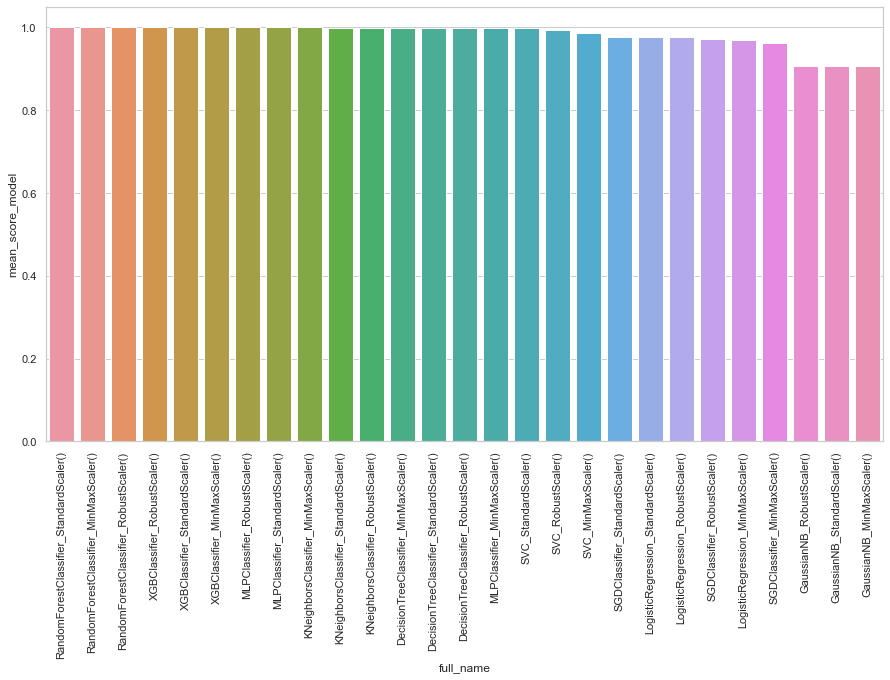

In [ ]:
# visualization between average score with every model and scalar
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'full_name', y = 'mean_score_model',data = df_sort[['full_name','mean_score_model']])
plt.xticks(rotation=90)
plt.show()

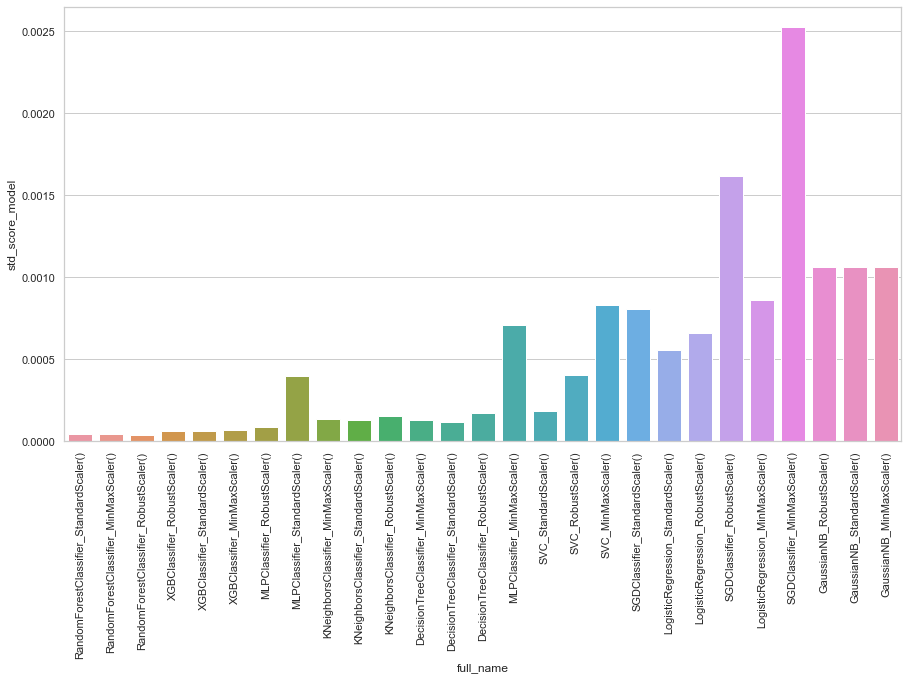

In [ ]:
# visualization between standard deviation score with every model and scalar
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'full_name', y = 'std_score_model',data = df_sort[['full_name','std_score_model']])
plt.xticks(rotation=90)
plt.show()

### Tuning Parameter

After we train model, then we will develop parameters. with RandomSearchCV In order to develop a more accurate model, the reason we don't use GridSearchCV because the data is very large, it takes a long time to run. RandomSearchCV takes up to 3 days to run if using GridSearchCV. It might take a month to run so I used RandomSearchCV to develop parameters. By RandomSearchCV It shows the best parameters and shows the best accuracy of each model and scalar in a data frame.
in this step we can see best scalar and best parameter.

In [ ]:

# all model and hyper parameter
model_params = {
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'clf__criterion': ["gini", "entropy"],
            'clf__splitter': ["best","random"],
            'clf__max_depth': [3,5,None],
            'clf__min_samples_split': [2,4,8],
            'clf__min_samples_leaf': [1,2,4],
            'clf__max_features':['auto','sqrt','log2']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params' : {
            'clf__penalty': ['l1','l2','elasticnet','none'],
            'clf__dual': [True,False],
            'clf__fit_intercept': [True,False],
            'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'clf__max_iter': [100,200,400,800],
            'clf__multi_class': ['auto','ovr','multinomial'],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params' : {
            'clf__n_estimators': [100,400,700,1000],
            'clf__max_features': ["auto", "sqrt"],
            'clf__max_depth' : [3,5,None],
            'clf__min_samples_split' : [2, 5, 10],
            'clf__min_samples_leaf' : [1, 2, 4],
            'clf__bootstrap': [True, False],
        }  
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'clf__n_neighbors': [5,7,9],
            'clf__weights': ['uniform', 'distance'],
            'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'clf__p': [1,2],
        }  
    },
    'SVC': {
        'model': SVC(),
        'params' : {
            'clf__gamma': ['scale','auto'],
            'clf__shrinking':[True,False],
            'clf__probability':[True,False],
            'clf__verbose':[True,False],
            'clf__decision_function_shape': ['ovo','ovr'],
            'clf__break_ties':[True,False],
        }  
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params' : {
            'clf__priors':[0.1,0.5, 0.9,None],
        }  
    },
    'XGBClassifier': {
        'model': XGBClassifier(),
        'params' : {
            'clf__max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15 ],
            'clf__learning_rate': [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
            'clf__n_estimators': [ 50, 75, 100, 125, 150 ],
            'clf__min_child_weight': [ 1, 3, 5, 7 ],
            'clf__gamma': [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
            'clf__colsample_bytree': [ 0.3, 0.4, 0.5, 0.7 ] 
        }  
    },
    'SGDClassifier': {
        'model': SGDClassifier(),
        'params' : {
            'clf__penalty': ['l2', 'l1', 'elasticnet'],
            'clf__l1_ratio': [0.15,0.50,0.85],
            'clf__fit_intercept': [True,False],
            'clf__max_iter': [1000,2000,4000],
            'clf__shuffle': [True,False],
            'clf__learning_rate': ['constant','optimal','invscaling','adaptive'],

        }
    },   
    'MLPClassifier' : {
        'model': MLPClassifier(),
        'params': {
            'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
            'clf__solver': ['lbfgs', 'sgd', 'adam'],
            'clf__power_t': [0.1,0.5,0.8],
            'clf__max_iter': [200,800,1600],
            'clf__shuffle': [True,False],
            'clf__verbose': [True,False],
            'clf__warm_start': [True,False],
            'clf__nesterovs_momentum': [True,False],
            'clf__early_stopping': [True,False],
            'clf__validation_fraction': [0.1,0.5,0.8]
        }
    },
}

scores = []
# In training a machine learning model, the problem that we often face is the distribution of data.
# we can use standard_scaler,robust_scaler,min_max_scaler to fix this problem
list_scalar = []
list_scalar.append(StandardScaler())
list_scalar.append(RobustScaler())
list_scalar.append(MinMaxScaler())

name_scalar = []
for i in range(len(list_scalar)):
  for model_name, mp in model_params.items():
    print('scalar = ',list_scalar[i] ,'model =',mp['model'], 'params =', mp['params'])
    # we use pipeline to combine scalar and model
    pipe = Pipeline(steps=[('scaler', list_scalar[i]), ('clf', mp['model'])])
    name_scalar = list_scalar[i]
    # we use RandomizedSearchCV instead GridSearchCV because it is fast
    # we use pipeline and parameter
    random_search = RandomizedSearchCV(
      estimator = pipe,
      param_distributions= mp['params'],
      n_iter=100,
      cv=5,
    )
    random_search.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'name_scalar':name_scalar,
        'best_score': random_search.best_score_,
        'best_params': random_search.best_params_,
        'best_estimator':random_search.best_estimator_
    })
# show accuracy, best_parameter and best_estimator in each model


# compare all model, f1-score, name scalar, best_params, best_estimator in one data frame and sort by model and best_score
df_random_search_cv = pd.DataFrame(scores,columns=['model','best_score','name_scalar','best_params','best_estimator'])
df_random_search_cv = df_random_search_cv.sort_values(by=['model','best_score'],ascending=False)

df_random_search_cv

Streaming output truncated to the last 5000 lines.
Validation score: 0.984086
Iteration 180, loss = 0.06852619
Validation score: 0.984086
Iteration 181, loss = 0.06818815
Validation score: 0.984194
Iteration 182, loss = 0.06785353
Validation score: 0.984194
Iteration 183, loss = 0.06752229
Validation score: 0.984302
Iteration 184, loss = 0.06719437
Validation score: 0.984411
Iteration 185, loss = 0.06686970
Validation score: 0.984411
Iteration 186, loss = 0.06654824
Validation score: 0.984519
Iteration 187, loss = 0.06622992
Validation score: 0.984519
Iteration 188, loss = 0.06591470
Validation score: 0.984519
Iteration 189, loss = 0.06560253
Validation score: 0.984627
Iteration 190, loss = 0.06529334
Validation score: 0.984627
Iteration 191, loss = 0.06498710
Validation score: 0.984627
Iteration 192, loss = 0.06468375
Validation score: 0.984627
Iteration 193, loss = 0.06438325
Validation score: 0.984627
Iteration 194, loss = 0.06408555
Validation score: 0.984735
Iteration 195, loss = 

,model,best_score,name_scalar,best_params,best_estimator
6,XGBClassifier,1.000000,StandardScaler(),"{'clf__n_estimators': 50, 'clf__min_child_weig...","(StandardScaler(), XGBClassifier(colsample_byt..."
15,XGBClassifier,1.000000,RobustScaler(),"{'clf__n_estimators': 50, 'clf__min_child_weig...","(RobustScaler(), XGBClassifier(colsample_bytre..."
24,XGBClassifier,0.999931,MinMaxScaler(),"{'clf__n_estimators': 50, 'clf__min_child_weig...","(MinMaxScaler(), XGBClassifier(colsample_bytre..."
4,SVC,1.000000,StandardScaler(),"{'clf__verbose': True, 'clf__shrinking': True,...","(StandardScaler(), SVC(break_ties=True, probab..."
22,SVC,1.000000,MinMaxScaler(),"{'clf__verbose': True, 'clf__shrinking': True,...","(MinMaxScaler(), SVC(break_ties=True, probabil..."
13,SVC,0.999861,RobustScaler(),"{'clf__verbose': True, 'clf__shrinking': True,...","(RobustScaler(), SVC(break_ties=True, probabil..."
7,SGDClassifier,1.000000,StandardScaler(),"{'clf__shuffle': True, 'clf__penalty': 'elasti...","(StandardScaler(), SGDClassifier(fit_intercept..."
16,SGDClassifier,0.999931,RobustScaler(),"{'clf__shuffle': True, 'clf__penalty': 'l1', '...","(RobustScaler(), SGDClassifier(max_iter=4000, ..."
25,SGDClassifier,0.999792,MinMaxScaler(),"{'clf__shuffle': False, 'clf__penalty': 'elast...","(MinMaxScaler(), SGDClassifier(fit_intercept=F..."
2,RandomForestClassifier,1.000000,StandardScaler(),"{'clf__n_estimators': 400, 'clf__min_samples_s...","(StandardScaler(), (DecisionTreeClassifier(max..."


In [ ]:
# temp best parameter and best scalar in every model
'DecisionTreeClassifier' ==> MinMaxScaler()	 ==> {'clf__splitter': 'random', 'clf__min_samples_split': 4, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': None, 'clf__criterion': 'entropy'}
'LogisticRegression' ==> MinMaxScaler()	==> {'clf__solver': 'saga', 'clf__penalty': 'none', 'clf__multi_class': 'multinomial', 'clf__max_iter': 400, 'clf__fit_intercept': False, 'clf__dual': False}
'RandomForestClassifier' ==> StandardScaler()	 ==> {'clf__n_estimators': 400, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': None, 'clf__bootstrap': False}
'KNeighborsClassifier' ==> StandardScaler()	==> {'clf__weights': 'uniform', 'clf__p': 1, 'clf__n_neighbors': 5, 'clf__algorithm': 'auto'}
'SVC' ==> StandardScaler() ==> {'clf__verbose': True, 'clf__shrinking': True, 'clf__probability': True, 'clf__gamma': 'scale', 'clf__decision_function_shape': 'ovr', 'clf__break_ties': True}
'GaussianNB' ==> StandardScaler()	==> {'clf__priors': None}	
'XGBClassifier' ==> StandardScaler() ==> {'clf__n_estimators': 50, 'clf__min_child_weight': 1, 'clf__max_depth': 8, 'clf__learning_rate': 0.05, 'clf__gamma': 0.4, 'clf__colsample_bytree': 0.7}
'SGDClassifier' ==> StandardScaler() ==> {'clf__shuffle': True, 'clf__penalty': 'elasticnet', 'clf__max_iter': 4000, 'clf__learning_rate': 'optimal', 'clf__l1_ratio': 0.15, 'clf__fit_intercept': False}
'MLPClassifier' ==> StandardScaler() ==> {'clf__warm_start': True, 'clf__verbose': False, 'clf__validation_fraction': 0.5, 'clf__solver': 'lbfgs', 'clf__shuffle': True, 'clf__power_t': 0.8, 'clf__nesterovs_momentum': False, 'clf__max_iter': 1600, 'clf__early_stopping': True, 'clf__activation': 'tanh'}

### Evaluation Multiple Model with tuning parameter

find the best model we train 9 model with best scalar and parameter we will do the following:


*   We will train 9 model machine learning models: Decision Tree, Logistic Regression, Random Forest K-Nearest Neighbor, Support Vector Machine, naive_bayes, XGBoost, Stochastic Gradient Descent, Multilayer perceptron.
*   we use best scalar in every model. 
*   we use best parameter in every model.
*   We will use the K-Fold Cross Validation (kfold cv) technique which allows the data to be distributed evenly to create and test the model. after we calculate and know the f1 score 10 fold. we calculate the average and standard deviation f1 score 10 fold.
*   evaluate the efficiency of all models where tp is the correct predicted data same to the answer. fp is the information contained in the solution but not in the prediction. fn is the predicted data incorrectly same answer. Precision is the accuracy value caused by comparing the tp value with fp. Recall is the accuracy value. Caused by comparing tp value with fn, F1 Score is the mean of Precision and Recall. We can combine precision,recall and f1_score can be combined with a single command classification_report
*   plot_confusion_matrix function to visualize the confusion matrix
*   compare the model's mean and standard deviation using a dataframe and barplot to measure average and standard Deviation of f1 score in every model.




scalar =  MinMaxScaler() name = DecisionTreeClassifier model = DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=4, splitter='random')
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_DecisionTreeClassifier: 0.9981530225295561


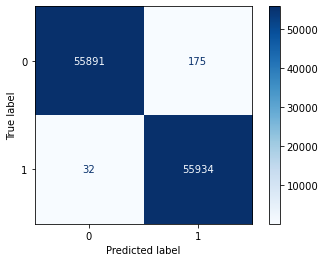

scalar =  MinMaxScaler() name = LogisticRegression model = LogisticRegression(fit_intercept=False, max_iter=400, multi_class='multinomial',
                   penalty='none', solver='saga')
LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     56066
           1       0.99      0.96      0.98     55966

    accuracy                           0.98    112032
   macro avg       0.98      0.98      0.98    112032
weighted avg       0.98      0.98      0.98    112032

f1_score_LogisticRegression: 0.9758250922308536


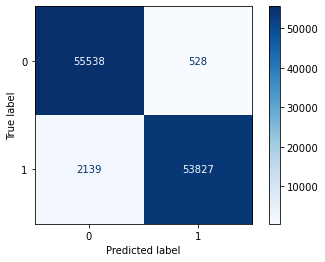

scalar =  StandardScaler() name = RandomForestClassifier model = RandomForestClassifier(bootstrap=False, min_samples_leaf=2)
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_RandomForestClassifier: 0.9999553320171167


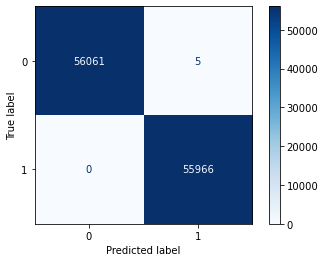

scalar =  StandardScaler() name = KNeighborsClassifier model = KNeighborsClassifier(p=1)
KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_KNeighborsClassifier: 0.9994374748872719


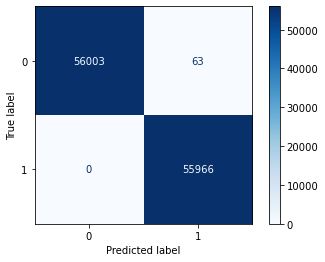

scalar =  StandardScaler() name = SVC model = SVC(break_ties=True, probability=True, verbose=True)
[LibSVM].........
*....*
optimization finished, #iter = 13884
obj = -6911.900516, rho = 2.422476
nSV = 9955, nBSV = 9329
Total nSV = 9955
.........
*....*.
*
optimization finished, #iter = 14315
obj = -6846.958656, rho = 2.386979
nSV = 9843, nBSV = 9224
Total nSV = 9843
..........
*....*.
*
optimization finished, #iter = 15242
obj = -6835.234052, rho = 2.415169
nSV = 9851, nBSV = 9221
Total nSV = 9851
.........
*....*
optimization finished, #iter = 13252
obj = -6863.295726, rho = 2.379937
nSV = 9885, nBSV = 9270
Total nSV = 9885
.........
*....*
optimization finished, #iter = 13735
obj = -6841.307030, rho = 2.401943
nSV = 9889, nBSV = 9279
Total nSV = 9889
...........
*...
*
optimization finished, #iter = 14920
obj = -7872.790477, rho = -2.640218
nSV = 11359, nBSV = 10740
Total nSV = 11359
[LibSVM]..........
*....*.
*
optimization finished, #iter = 14515
obj = -6798.639918, rho = 2.346983

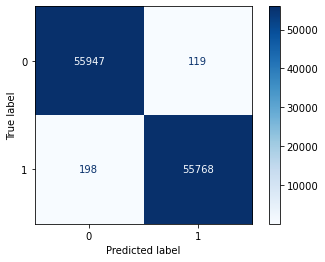

scalar =  StandardScaler() name = GaussianNB model = GaussianNB()
GaussianNB
              precision    recall  f1-score   support

           0       0.86      0.97      0.92     56066
           1       0.97      0.85      0.90     55966

    accuracy                           0.91    112032
   macro avg       0.92      0.91      0.91    112032
weighted avg       0.92      0.91      0.91    112032

f1_score_GaussianNB: 0.903707940139167


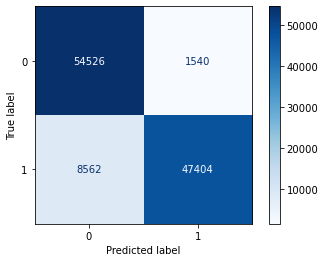

scalar =  StandardScaler() name = XGBClassifier model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0.4,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                     

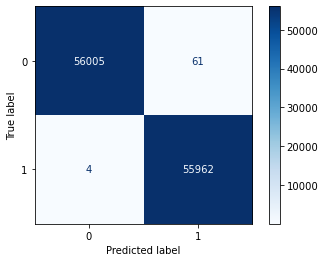

scalar =  StandardScaler() name = SGDClassifier model = SGDClassifier(fit_intercept=False, penalty='elasticnet')
SGDClassifier
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     56066
           1       0.99      0.90      0.94     55966

    accuracy                           0.94    112032
   macro avg       0.95      0.94      0.94    112032
weighted avg       0.95      0.94      0.94    112032

f1_score_SGDClassifier: 0.9396558174335953


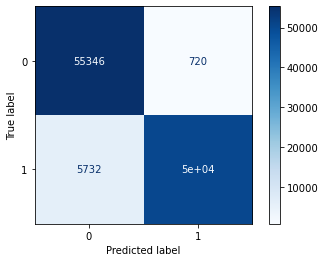

scalar =  StandardScaler() name = MLPClassifier model = MLPClassifier(activation='tanh', early_stopping=True, max_iter=1600,
              nesterovs_momentum=False, power_t=0.8, solver='lbfgs',
              validation_fraction=0.5, warm_start=True)
MLPClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032

f1_score_MLPClassifier: 0.9995267223288833


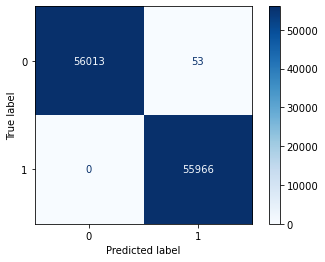

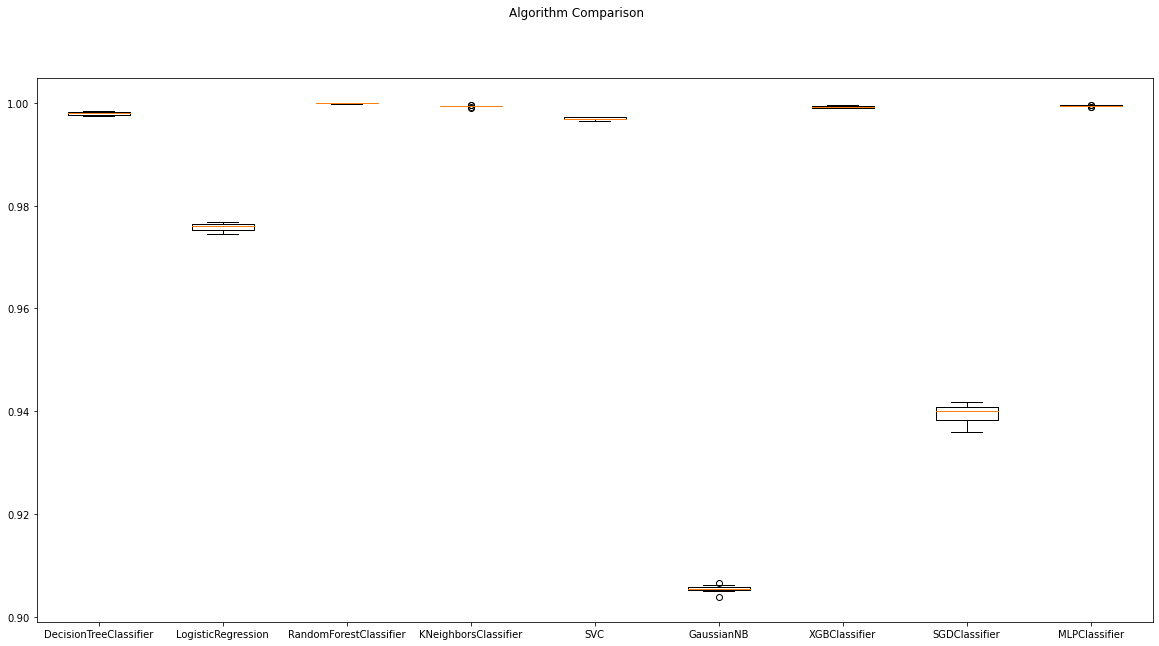

,name_model,name_scalar,mean_score_model,std_score_model,f1_score
2,RandomForestClassifier,StandardScaler(),0.999911,0.000050,0.999955
8,MLPClassifier,StandardScaler(),0.999447,0.000141,0.999527
3,KNeighborsClassifier,StandardScaler(),0.999315,0.000159,0.999437
6,XGBClassifier,StandardScaler(),0.999233,0.000170,0.999420
0,DecisionTreeClassifier,MinMaxScaler(),0.997892,0.000296,0.998153
4,SVC,StandardScaler(),0.996923,0.000254,0.997166
1,LogisticRegression,MinMaxScaler(),0.975836,0.000726,0.975825
7,SGDClassifier,StandardScaler(),0.939428,0.001915,0.939656
5,GaussianNB,StandardScaler(),0.905452,0.000699,0.903708


In [ ]:
from sklearn.pipeline import Pipeline

# we use best parameter and best scalar in every model
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(splitter= 'random', min_samples_split= 4, min_samples_leaf= 1, max_features= 'log2', max_depth= None, criterion= 'entropy'),MinMaxScaler()))
models.append(('LogisticRegression', LogisticRegression(solver= 'saga', penalty= 'none', multi_class= 'multinomial', max_iter= 400, fit_intercept= False, dual= False),MinMaxScaler()))
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False),StandardScaler()))
models.append(('KNeighborsClassifier', KNeighborsClassifier(weights= 'uniform', p= 1, n_neighbors= 5, algorithm= 'auto'),StandardScaler()))
models.append(('SVC', SVC(verbose= True, shrinking= True, probability= True, gamma= 'scale', decision_function_shape= 'ovr', break_ties= True),StandardScaler()))
models.append(('GaussianNB', GaussianNB(priors= None),StandardScaler()))
models.append(('XGBClassifier', XGBClassifier(n_estimators= 100, min_child_weight= 1, max_depth= 8, learning_rate= 0.05, gamma= 0.4, colsample_bytree= 0.7),StandardScaler()))
models.append(('SGDClassifier', SGDClassifier(shuffle= True, penalty= 'elasticnet', max_iter= 1000, learning_rate= 'optimal', l1_ratio= 0.15, fit_intercept= False),StandardScaler()))
models.append(('MLPClassifier', MLPClassifier(warm_start= True, verbose= False, validation_fraction= 0.5, solver= 'lbfgs', shuffle= True, power_t= 0.8, nesterovs_momentum= False, max_iter= 1600, early_stopping= True, activation= 'tanh'),StandardScaler()))

all_name_model = []
all_mean_score = []
all_std_score = []
# evaluate each model in turn
results = []
names = []
name_scalar = []
list_temp_f1_score = []
for name, model,type_scalar in models:
  print('scalar = ',type_scalar ,'name =',name, 'model =', model)
  # we use pipeline to combine scalar and model
  pipe = Pipeline([('scaler', type_scalar), ('clf', model)])
  name_scalar.append(type_scalar)
  # we use kfold technique which allows the data to be distributed evenly to 
  # create and test the model. after we calculate and know the f1 score 10 fold.
  #  we calculate the average and standard deviation f1 score 10 fold.
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1")
  pipe.fit(X_train, y_train)
  # predict y value
  y_pred_model =pipe.predict(X_test)
  results.append(cv_results)
  names.append(name)
  all_name_model.append(name)
  # cross validation mean score
  all_mean_score.append(cv_results.mean())
  # cross validation std score
  all_std_score.append(cv_results.std())
  print(name)
  # classification_report
  print(classification_report(y_test, y_pred_model))
  # accuracy score
  print(f'f1_score_{name}:',f1_score(y_test, y_pred_model))
  list_temp_f1_score.append(f1_score(y_test, y_pred_model))
  # confusion_matrix
  plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
  plt.show()
# boxplot algorithm comparison
fig = plt.figure(figsize = (20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# plt.figure(figsize = (90,30))
plt.show()
# data frame comparison
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'name_scalar': name_scalar,
    'mean_score_model' : all_mean_score,
    'std_score_model' : all_std_score,
    'f1_score':list_temp_f1_score
})
# sort model with average score model to see easily
df_sort = df_origin_predict.sort_values(by=['mean_score_model'],ascending=False)
display(df_sort)


### Best model classification

this paper has said before that if humans guess there is no fraud transaction, people will guess this dataset correct at 99.8272514369 percent.
There are up to 4 models that can be predicted more accurately than the human answer which tells don't have fraud transactions. which have Random Forest with an accuracy of 0.999911 percent and standard deviation of 0.000050 percent, Multilayer perceptron with an accuracy of 0.999447 percent and  standard deviation of 0.000141 percent, K-Nearest Neighbors with an accuracy of 0.999315 percent and standard deviation of 0.000159 percent. , XGBoost has an accuracy of 0.999233 percent and standard deviation of 0.000170 percent. The four deviations were very small with the lowest accuracy being greater than the human tells don't have fraud transactions.

by the best model in the machine learning is Random Forest. with an accuracy of 0.999911 percent and standard deviation of 0.000050 percent

By looking at confusion maxtrix, only 5 transactions out of 112032 transactions (test set) have false positives, which is very little. this error can be tolerated and the model can be used in real-life situations due to its very high accuracy. while having lower-than-human errors.

scores: .0.999902 +/- .0.000049
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032



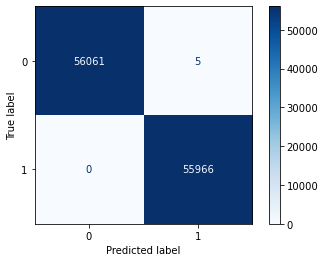

In [ ]:
# use best scalar and best parameter
type_scalar = StandardScaler()
the_best_model_classification = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False)
 # we use pipeline to combine scalar and model
pipe = Pipeline([('scaler', type_scalar), ('clf', the_best_model_classification)])
pipe.fit(X_train, y_train)
kfold = model_selection.KFold(n_splits=10)
# predict data and metric with f1-score
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
# visualization precision,recall,score
print(classification_report(y_test, pipe.predict(X_test)))
# visualization confusion matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")

### Feature Important

We can use feature importance to tell which important feature is to a model compared to other features.

We can see that V4 and V12 columns are very important to impact accuracy models while columns Time,V1,V3, V8, and V10 are lower impact but they still impact the accuracy model. In addition to the columns mentioned above, they have very little or no effect on accuracy.

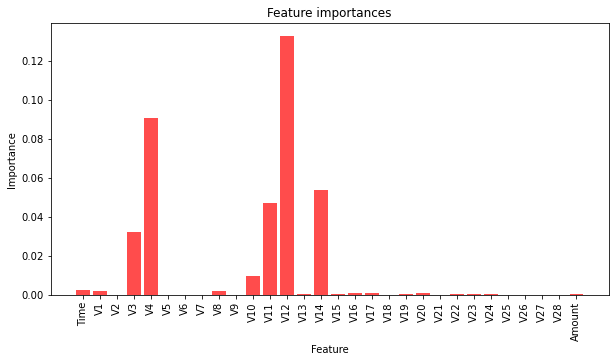

In [ ]:
# virtualization feature importances
def get_feature_importance(j, n):
  y_pred = pipe.predict(X_test)
  s = f1_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = pipe.predict(X_test_)
    s_ij = f1_score(y_test, y_pred_)
    # score importance
    total += s_ij
  return s - total / n

# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(10, 5))
plt.bar(features, f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]), rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()

### Predict Data

we try predict Check the data by taking the dataset row 524 at class=0 and row 525 at class=1. Both row appear to be correct.

In [ ]:
# we predict record 524 and 525 of dataset
# 524 record can predict 0
# 525 record can predict 1

df_predict = pd.DataFrame({})
df_predict['Time'] = [406,406]
df_predict['V1'] = [-0.814053958801928,-2.3122265423263]
df_predict['V2'] = [1.53822155691255,1.95199201064158]
df_predict['V3'] = [1.11568996367136,-1.60985073229769]
df_predict['V4'] = [-0.0516668053669614,3.9979055875468]
df_predict['V5'] = [0.0923341570300812,-0.522187864667764]
df_predict['V6'] = [-1.0133978787151,-1.42654531920595]
df_predict['V7'] = [0.748850873917274,-2.53738730624579]
df_predict['V8'] = [-0.124813887886896,1.39165724829804]
df_predict['V9'] = [-0.207406950350359,-2.77008927719433]
df_predict['V10'] = [0.0728417294342756,-2.77227214465915]
df_predict['V11'] = [0.0582845272450801,3.20203320709635]
df_predict['V12'] = [0.639903034792989,-2.89990738849473]
df_predict['V13'] = [1.42894200092882,-0.595221881324605]
df_predict['V14'] = [-0.830482497203489,-4.28925378244217]
df_predict['V15'] = [0.782317854199766,0.389724120274487]
df_predict['V16'] = [0.278964105860231,-1.14074717980657]
df_predict['V17'] = [-0.0836263151106963,-2.83005567450437]
df_predict['V18'] = [-0.33330804312115,-0.0168224681808257]
df_predict['V19'] = [-0.158428707782224,0.416955705037907]
df_predict['V20'] = [0.44519893817017,0.126910559061474]
df_predict['V21'] = [-0.311451578788249,0.517232370861764]
df_predict['V22'] = [-0.627543768547017,-0.0350493686052974]
df_predict['V23'] = [-0.0164685816473858,-0.465211076182388]
df_predict['V24'] = [0.363402524019832,0.320198198514526]
df_predict['V25'] = [-0.0146310818509394,0.0445191674731724]
df_predict['V26'] = [0.0769141479206171,0.177839798284401]
df_predict['V27'] = [0.467478413040824,0.261145002567677]
df_predict['V28'] = [0.228122870012143,-0.143275874698919]
df_predict['Amount'] = [1.98,0]

# transform feature
features = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
sample_data_classification = df_predict.loc[:, features].to_numpy()

# # predict data
sdc_predict = pipe.predict(sample_data_classification)
sdc_predict

array([0, 1])

## convolution neural network with Deep Learning

Now that we've completed the process of machine learning and let's try to predict deep learning, the most popular and accurate model is the Convolutional Neural Network.

### using scalar

In the Train Machine Learning Model, the problem that we will encounter often is the distribution of the data. We can see in EDA the data is normal distribution. We will use a StandardScaler. that is suitable for the data in a normal distribution format to solve this problem.

In [ ]:
# create standard_scalar for convolution neural network
scaler=StandardScaler()
X_train_scalar=scaler.fit_transform(X_train)
X_test_scalar=scaler.transform(X_test)

X_train_scalar=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_scalar=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

### Train model with Convolution neural network

We will train a model with a convolution neural network with the following variables:


*   Conv1D layer will Create a feature map 
*   Flatten layer will Convert multidimensional output data to 1 dimension to prepare data in a format that is ready for input to fully connected layer.
*   Dense layer or Fully connected Layer is Data from every input is connected to every output node, each connection multiplied by a different weight, and every output node can assign the appropriate activation.
*   Dropout is we can us one model to simulate into multiple models by randomly removing some nodes during training. It's a smart one. It saves both time and resources, and most importantly, we don't have to maintain multiple models. It is a method of regularization, reducing memorization of exams, reducing overfit, and improving the deep neural network model in every generalization architecture.
*   BatchNormalization is a technique used during machine learning training to adjust the shift, scale so that the activation within the deep neural network's hidden layer is appropriately sized, not too small, not too big. By comparing the mean and standard deviations of every activation in the entire batch layer, it is similar to the input feature scaling and is complemented by learning parameters to allow the model to learn to adjust the activation as needed.
*   ReLU, short for Rectified Linear Unit, is a rectified linear function Rectified is not S-shaped like the previous two. ReLU is simpler than all previous activation functions, but powerful because if input is positive, the slope equals 1 forever, keeping the gradient from vanishing (no vanishing gradients) so we train the model much faster[4]. We will use it when train model.
*   We use activation='sigmoid' when we want the answer 0 or 1 which is used at the end.[5]

In [ ]:

cnn_model=Sequential()
# use train data to train model
cnn_model.add(Conv1D(64,2,activation='relu',input_shape=X_train_scalar[0].shape))
cnn_model.add(BatchNormalization())
# It is a method of regularization, reducing memorization of exams, reducing overfit, and improving the deep neural network model in every generalization architecture.
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv1D(64,2,activation='relu'))
cnn_model.add(BatchNormalization())
# It is a method of regularization, reducing memorization of exams, reducing overfit, and improving the deep neural network model in every generalization architecture.
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv1D(128,2,activation='relu'))
cnn_model.add(BatchNormalization())
# It is a method of regularization, reducing memorization of exams, reducing overfit, and improving the deep neural network model in every generalization architecture.
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(64,activation='relu'))
# It is a method of regularization, reducing memorization of exams, reducing overfit, and improving the deep neural network model in every generalization architecture.
cnn_model.add(Dropout(0.5))
# We use activation='sigmoid' when we want the answer 0 or 1 which is used at the end.
cnn_model.add(Dense(1,activation='sigmoid'))

When we look at the summary, we can see the model data. What is the number and type of each layer, output, and param

In [ ]:
# describe every layer, output, and parameter
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 batch_normalization (BatchN  (None, 29, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            8256      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

We will create three functions to measure are recall,precision,f1 score in deep learning

In [ ]:
# import keras library
from keras import backend as KB

# create recall metric function
def recall_model(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    possible_positives = KB.sum(KB.round(KB.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + KB.epsilon())
    return recall

# create precision metric function
def precision_model(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    predicted_positives = KB.sum(KB.round(KB.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + KB.epsilon())
    return precision

# create f1-score metric function
def f1_model(y_true, y_pred):
    precision = precision_model(y_true, y_pred)
    recall = recall_model(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+KB.epsilon()))

An Optimizer is a mathematical function that depends on the model's learned parameters, such as Weight and Bias. The Optimizer lets you know how to change the Neural Network's Weight and Learning Rate to reduce Loss or Error, giving the model better performance.

Each variable performs the following functions:

*   We will use adam which is method random gradient method based on (adaptive estimation) of the first and second time
*   We will show metric accuracy, f1 score, precision, recall.
*   We define the Loss Function as binary_crossentropy.


In [ ]:
# We will use adam which is method random gradient method based on (adaptive estimation) of the first and second time
# We will show metric accuracy, f1 score, precision, recall.
# We define the Loss Function as binary_crossentropy.
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy',f1_model,precision_model, recall_model])


We train the model by giving iteration=30 times.

In [ ]:
# we use epoch=30. it is  iteration 30 times
cnn_history = cnn_model.fit(X_train_scalar,y_train,epochs=30,validation_data=(X_test_scalar,y_test))

Epoch 1/30
14004/14004 [==============================] - 112s 7ms/step - loss: 0.0704 - accuracy: 0.9744 - f1_model: 0.9732 - precision_model: 0.9808 - recall_model: 0.9675 - val_loss: 0.0200 - val_accuracy: 0.9929 - val_f1_model: 0.9928 - val_precision_model: 0.9870 - val_recall_model: 0.9991
Epoch 2/30
14004/14004 [==============================] - 101s 7ms/step - loss: 0.0207 - accuracy: 0.9930 - f1_model: 0.9928 - precision_model: 0.9923 - recall_model: 0.9937 - val_loss: 0.0098 - val_accuracy: 0.9964 - val_f1_model: 0.9964 - val_precision_model: 0.9930 - val_recall_model: 1.0000
Epoch 3/30
14004/14004 [==============================] - 102s 7ms/step - loss: 0.0129 - accuracy: 0.9961 - f1_model: 0.9959 - precision_model: 0.9952 - recall_model: 0.9969 - val_loss: 0.0069 - val_accuracy: 0.9977 - val_f1_model: 0.9976 - val_precision_model: 0.9954 - val_recall_model: 1.0000
Epoch 4/30
14004/14004 [==============================] - 111s 8ms/step - loss: 0.0097 - accuracy: 0.9970 - f1_m

### Metric

We'll test the model's accuracy with  test set, using the .evaluate method:

Display metrics to see the model's performance. The values we show are loss, accuracy, f1 score, precision, recall.

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = cnn_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])



3501/3501 [==============================] - 13s 4ms/step - loss: 0.0014 - accuracy: 0.9996 - f1_model: 0.9996 - precision_model: 0.9993 - recall_model: 1.0000
[0.0014157205587252975, 0.9996250867843628, 0.9996273517608643, 0.9992803335189819, 1.0]
test_loss: 0.0014157205587252975
test_accuracy: 0.9996250867843628
test_f1: 0.9996273517608643
test_precision: 0.9992803335189819
test_recall: 1.0


We measured the results by comparing the Probability Score results from the model with the Label {1,0}. The goal was to determine how well the score's rank aligned with the label. The predominant metric is ROC AUC Score

In [ ]:
# show results by comparing the Probability Score results from the model with the Label {1,0}
from sklearn.metrics import roc_auc_score
predition = cnn_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
AUC: 99.96%


in confusion matrix, it can be seen that the convolution neural network has only 42 wrong answers.

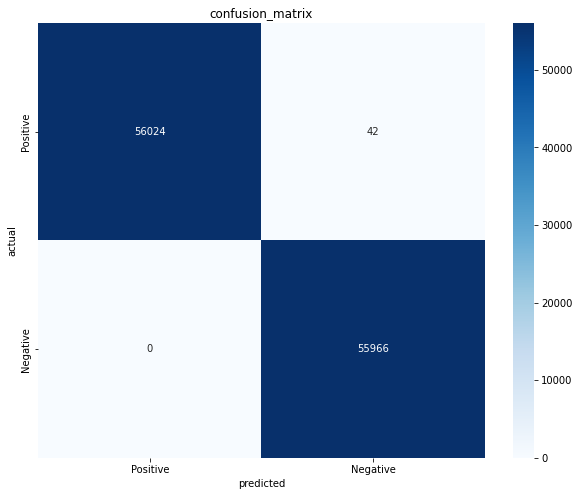

In [ ]:
# show data with confusion matrix it can be seen that error 42 transaction from 112032 transaction
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=["Positive","Negative"], yticklabels=["Positive","Negative"], cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()


### visualization

show accuracy and loss model in each iteration

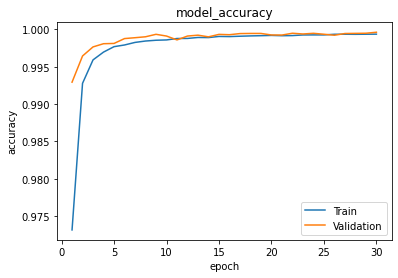

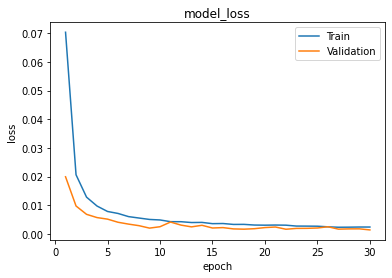

In [ ]:
# visualization 30 epoch
total_epoch = range(1,30+1)
# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['f1_model'])
plt.plot(total_epoch,cnn_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['loss'])
plt.plot(total_epoch,cnn_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'])
plt.show()

we use classification_report to show precision, recall ,and f1-score of model

In [ ]:
# show precision, recall, f1-score by classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56066
           1       1.00      1.00      1.00     55966

    accuracy                           1.00    112032
   macro avg       1.00      1.00      1.00    112032
weighted avg       1.00      1.00      1.00    112032



this paper has said before that if humans guess there is no fraud transaction, people will guess this dataset correct at 99.8272514369 percent.

in convolution neural network we have f1_score = 0.999624912926215 which is higher score than human guess. it can use in real life. However, we should use Random Forest because Random Forest have f1-score = 0.999911 percent. Random Forest is highest accuracy in every model and it is most sultable for use in real life

In [ ]:
# show f1-score in convolution neural network 
print(f'f1_score:',f1_score(y_test, y_pred))

f1_score: 0.999624912926215


### Feature Importance

We can use feature importance to tell which important feature is to a model compared to other features.

We can see that V14 columns are very important to impact accuracy models while columns V1,V2,V3, ...V27 are lower impact but they still impact the accuracy model. In addition Time,V28,Amout column have very little or no effect on accuracy.

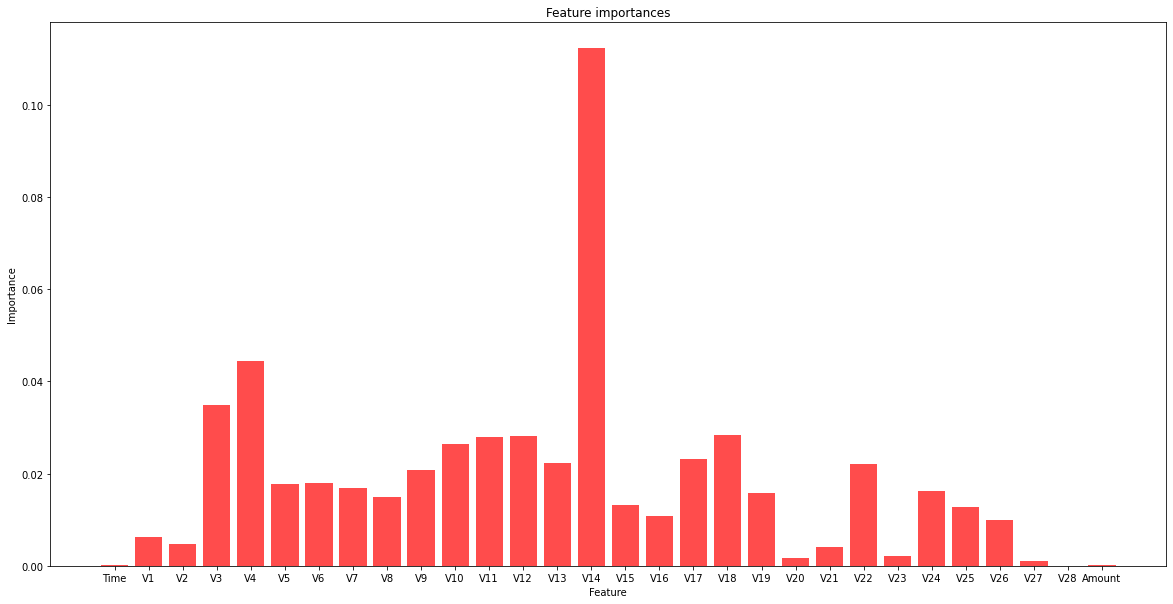

In [ ]:
# virtualization feature importances
def get_feature_importance(j, n):
  y_pred = cnn_model.predict(X_test_scalar)
  s = r2_score(y_test, y_pred) # baseline score
  # s = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test_scalar.shape[0]))
    X_test_ = X_test_scalar.copy()
    X_test_[:, j] = X_test_scalar[perm, j]
    y_pred_ = cnn_model.predict(X_test_)
    s_ij = r2_score(y_test, y_pred_)
    # s_ij = np.sqrt(metrics.mean_squared_error(y_test, y_pred_))
    # score importance
    total += s_ij
  return s - total / n

# Feature importances
f = []
for j in range(X_test_scalar.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(20, 10))
plt.bar(features, f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test_scalar.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()

### predict data

we try predict Check the data by taking the dataset row 524 at class=0 and record predict = 0. it is correct.

In [ ]:
# we predict record 524 of dataset
# 524 record can predict 0
df_predict = pd.DataFrame({})
df_predict['Time'] = [406]
df_predict['V1'] = [-0.814053958801928]
df_predict['V2'] = [1.53822155691255]
df_predict['V3'] = [1.11568996367136]
df_predict['V4'] = [-0.0516668053669614]
df_predict['V5'] = [0.0923341570300812]
df_predict['V6'] = [-1.0133978787151]
df_predict['V7'] = [0.748850873917274]
df_predict['V8'] = [-0.124813887886896]
df_predict['V9'] = [-0.207406950350359]
df_predict['V10'] = [0.0728417294342756]
df_predict['V11'] = [0.0582845272450801]
df_predict['V12'] = [0.639903034792989]
df_predict['V13'] = [1.42894200092882]
df_predict['V14'] = [-0.830482497203489]
df_predict['V15'] = [0.782317854199766]
df_predict['V16'] = [0.278964105860231]
df_predict['V17'] = [-0.0836263151106963]
df_predict['V18'] = [-0.33330804312115]
df_predict['V19'] = [-0.158428707782224]
df_predict['V20'] = [0.44519893817017]
df_predict['V21'] = [-0.311451578788249]
df_predict['V22'] = [-0.627543768547017]
df_predict['V23'] = [-0.0164685816473858]
df_predict['V24'] = [0.363402524019832]
df_predict['V25'] = [-0.0146310818509394]
df_predict['V26'] = [0.0769141479206171]
df_predict['V27'] = [0.467478413040824]
df_predict['V28'] = [0.228122870012143]
df_predict['Amount'] = [1.98]


features = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
sample_data_classification = df_predict.loc[:, features].to_numpy()

# using standard scaler
scaler=StandardScaler()
sample_data_classification=scaler.fit_transform(sample_data_classification)
sample_data_classification=scaler.transform(sample_data_classification)

# # predict test set data
sdc_predict = cnn_model.predict(sample_data_classification)
list_sdc = sdc_predict.tolist()
# predict label depend on feature
result_predict = [int(list_sdc[i][0]) for i in range(len(list_sdc))]
result_predict

[0]

# (iii.) the results of the experiments 

If a human thinks that every transaction does not have a fraud transaction, the accuracy of 99.8272514369percent In which the default parameters are accurate enough to be used in practice up to 14 models include
1.   model RandomForestClassifier using StandardScaler() with an average accuracy of 0.999895 percent, the standard deviation of 0.000046.
2.   model RandomForestClassifier using MinMaxScaler() with an average accuracy of 0.999889 percent standard deviation of 0.000048.
3.   model RandomForestClassifier using RobustScaler() with an average accuracy of 0.999886 percent, the standard deviation of 0.000039.
4.   model XGBClassifier using RobustScaler() with an average accuracy of 0.999842 percent, the standard deviation of 0.000062.
5.   model XGBClassifier using StandardScaler() with an average accuracy of 0.999842 percent, the standard deviation of 0.000062.
6.   model XGBClassifier using MinMaxScaler() with an average accuracy of 0.999826 percent, the standard deviation of 0.000067.
7.   model MLPClassifier using RobustScaler() with an average accuracy of 0.999730 percent, the standard deviation of 0.000087.
8.   model MLPClassifier using StandardScaler() with an average accuracy of 0.999617 percent, the standard deviation of 0.000398.
9.   model KNeighborsClassifier using MinMaxScaler() with average accuracy of 0.999364 percent standard deviation of 0.000139
10.   model KNeighborsClassifier using StandardScaler() with an average accuracy of 0.999070 percent, the standard deviation of 0.000131
11.   model KNeighborsClassifier using RobustScaler() with an average accuracy of 0.998683 percent, the standard deviation of 0.000152.
12.   model DecisionTreeClassifier using MinMaxScaler() with an average accuracy of 0.998587 percent, the standard deviation of 0.000131.
13.   model DecisionTreeClassifier using StandardScaler() with an average accuracy of 0.998522 percent, the standard deviation of 0.000117.
14.   model DecisionTreeClassifier using RobustScaler() with an average accuracy of 0.998484 percent, the standard deviation of 0.000173.




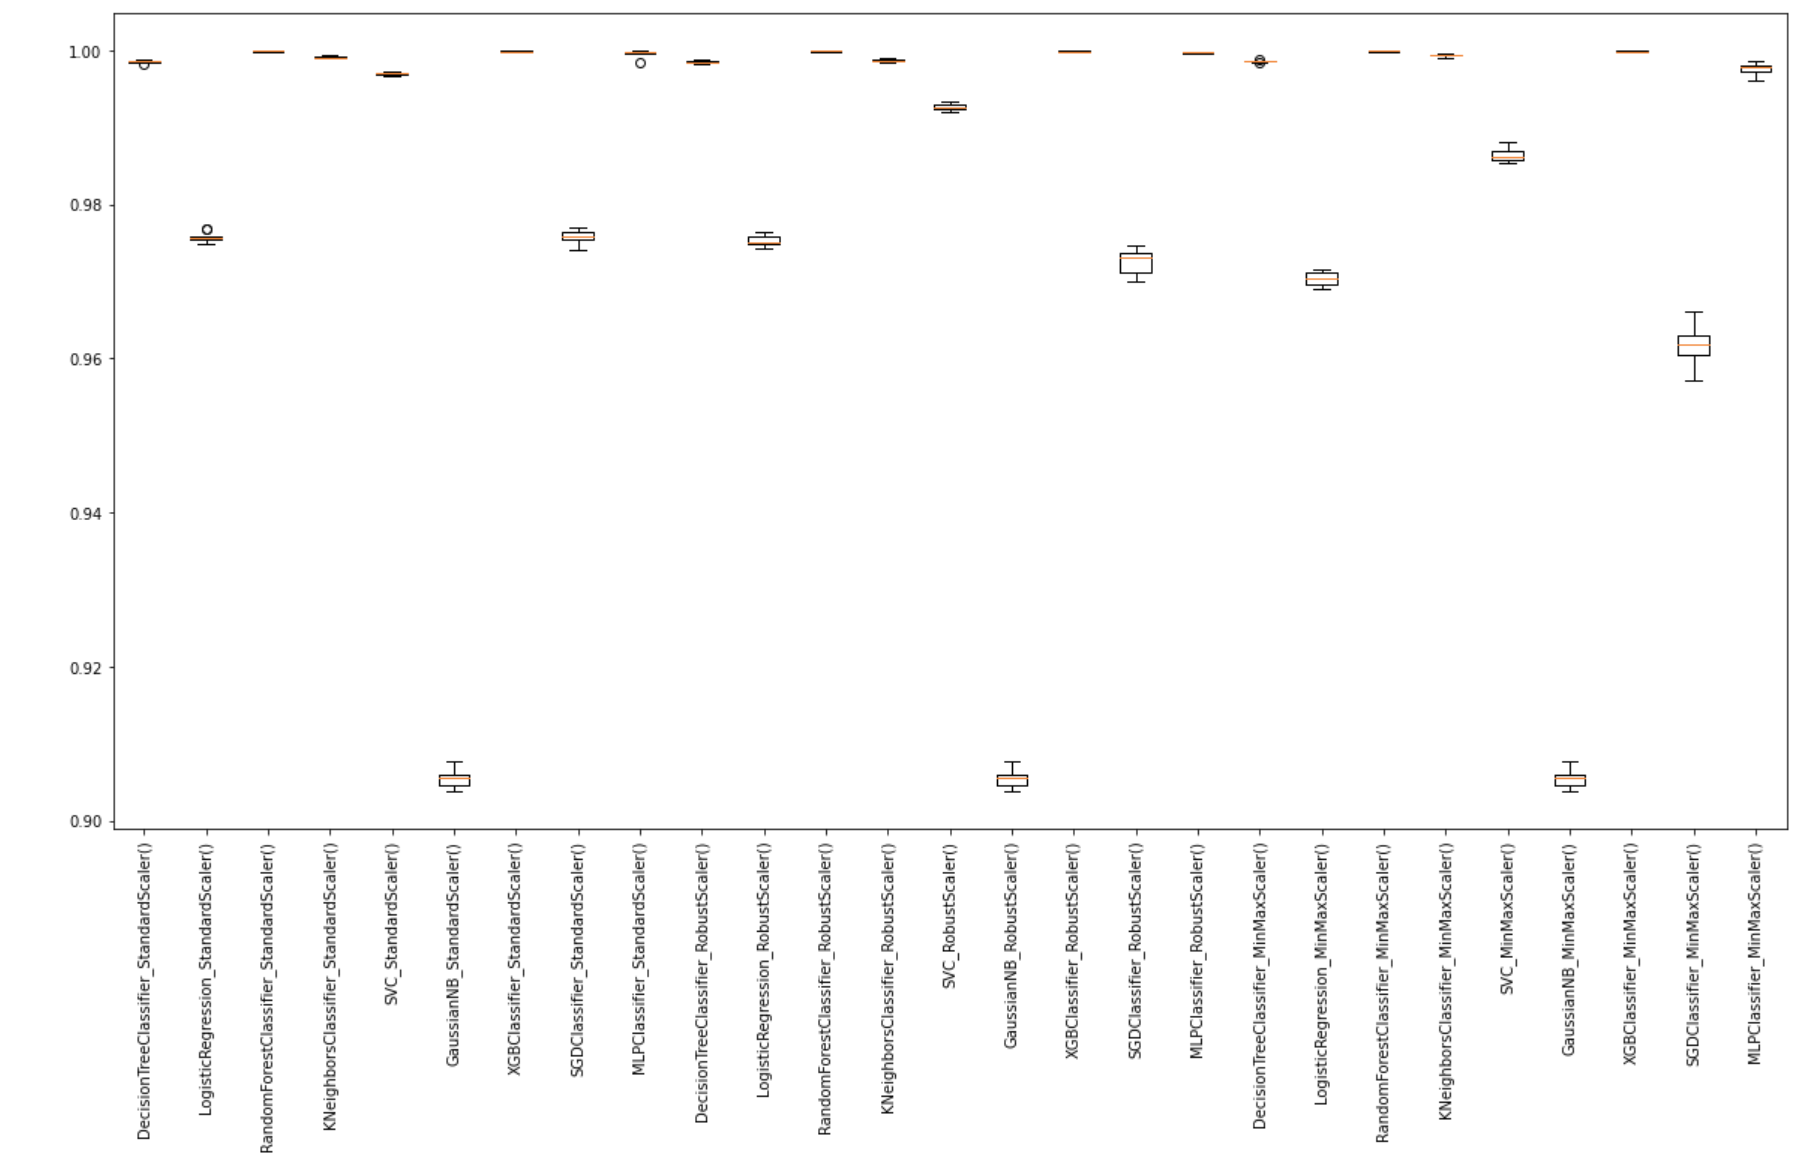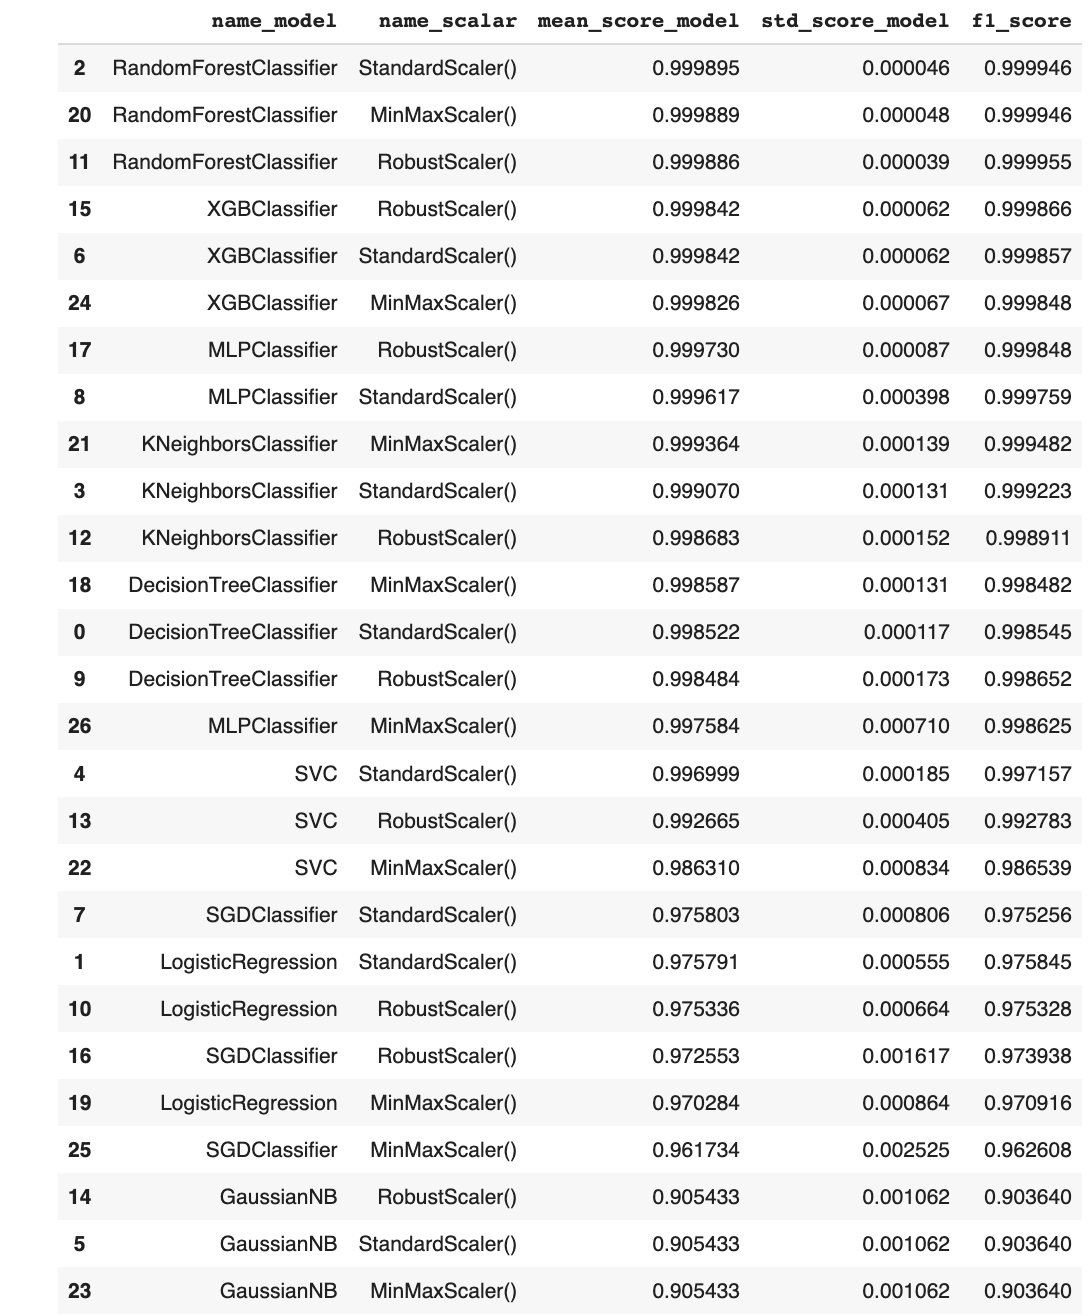

However, we were not satisfied with the results because we thought there could be a more accurate predictive model, so we developed the parameter with RandomSearchCV. The reason why GridSearchCV is not used is that it takes a very long time to run, which is estimated to be one month to complete due to RandomSearchCV. It takes 3 days to run. which GridSearchCV uses more time than RandomSearchCV.

When we run RandomSearchCV, it will show Best parameter and f1-score of each scalar and model.

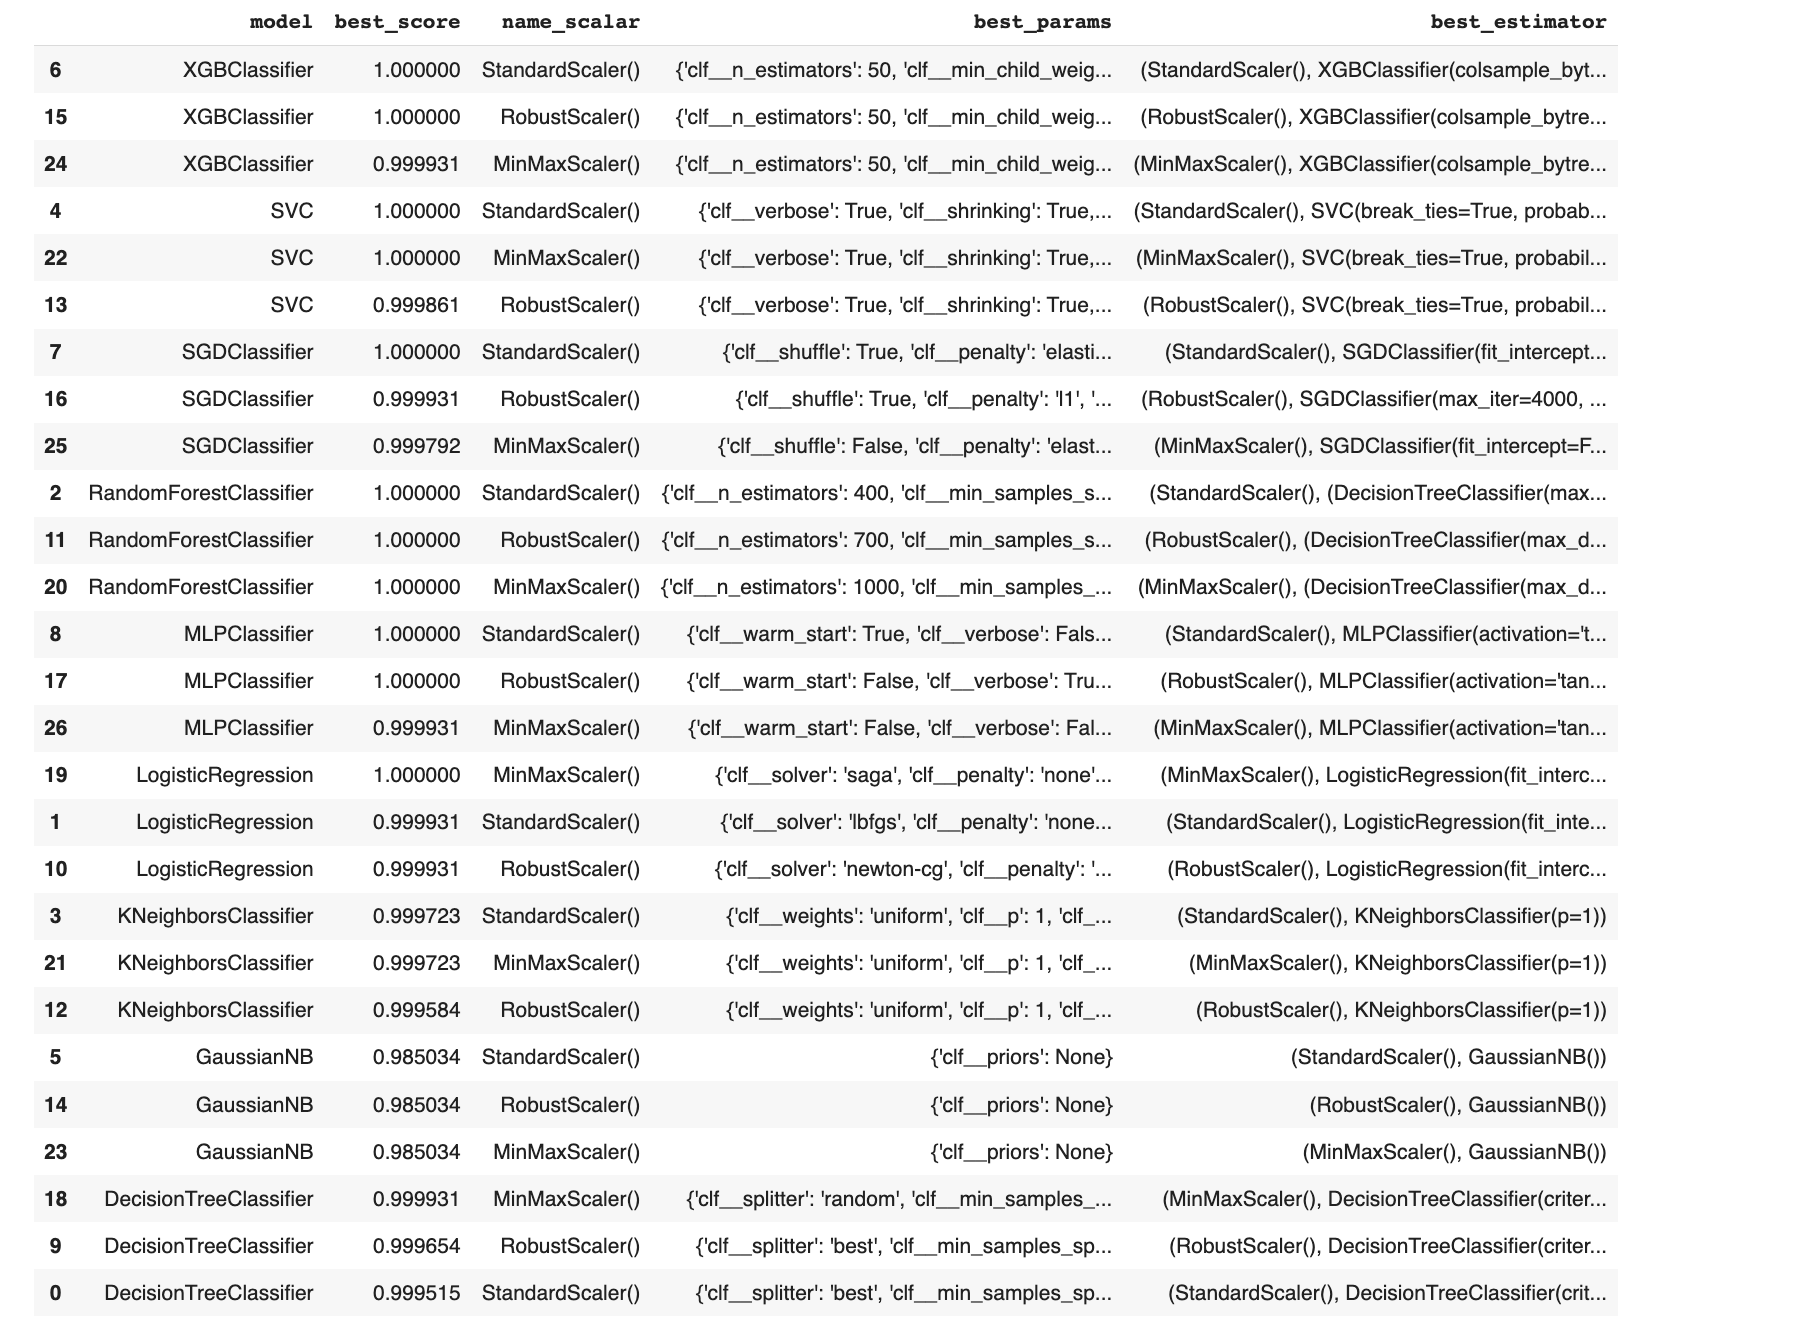

We then used only the scalar and parameters with the best f1-score values of each model to predict.

We use the scalar and the best parameters of the model. This makes the models more accurate. Based on the results of the experiment, 4 models were more accurate than humans choosing don't have fraud transactions include 
1. Random Forest with an accuracy of 0.999911 percent and standard deviation of 0.000050 percent.
2. Multilayer perceptron with an accuracy of 0.999447 percent and standard deviation of 0.000141 percent.
3. K-Nearest Neighbors with an accuracy of 0.999315 percent and standard deviation of 0.000159 percent. 
4. XGBoost has an accuracy of 0.999233 percent and a standard deviation of 0.000170 percent. 

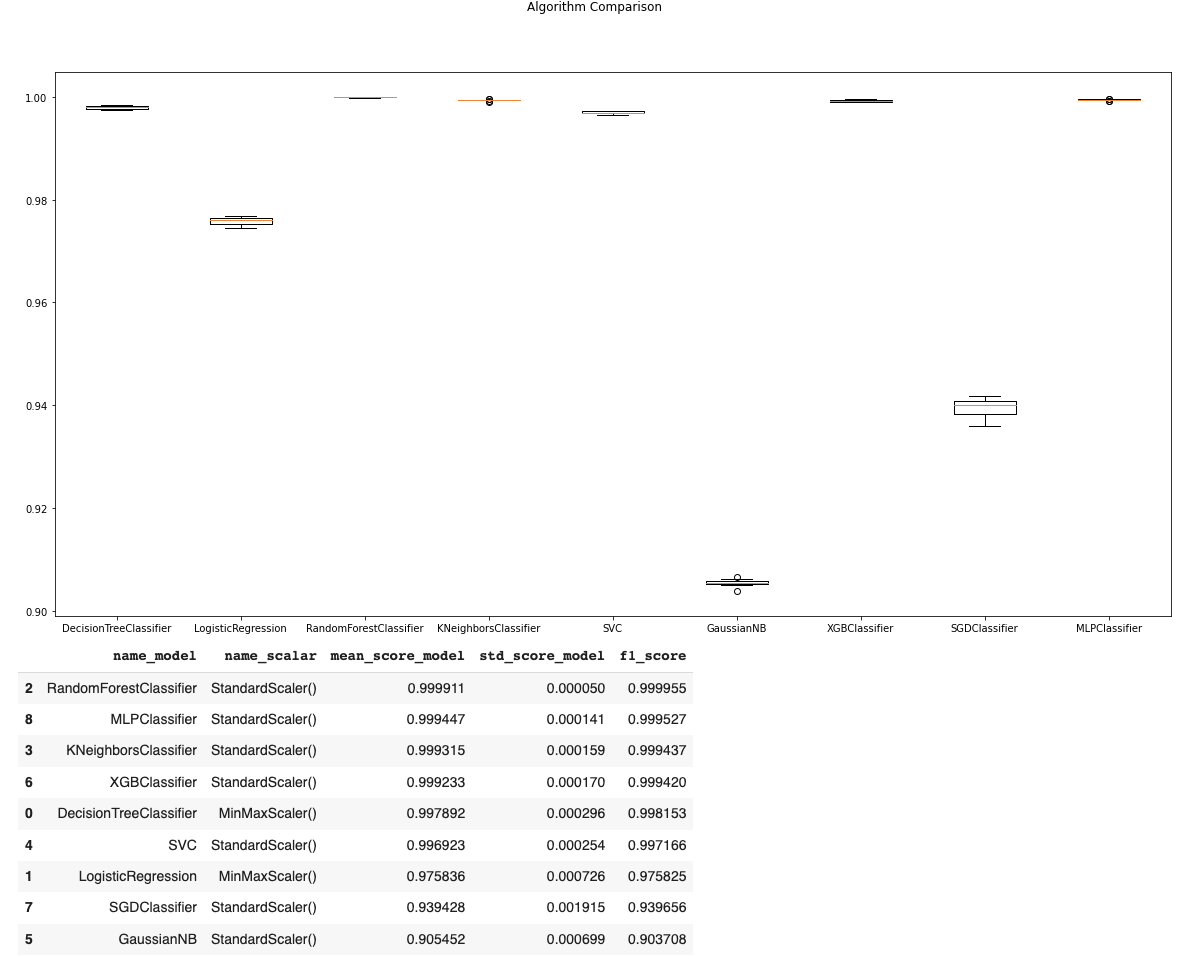

While we tried Deep learning with convolution neural network and got f1-score at 0.999624912926215. This is more efficient than humans choosing don't have fraud transactions but still less than model machine learning.

It can be seen that, The best model was Random Forest using RandomSearchCV to get the best parameters and scalar, resulting in a more accurate model with an accuracy of 0.999911 percent and a standard deviation of 0.000050 percent.
When we look at the model from confusion matrix, only 5 transactions out of 112032 transactions (test set) have false positives, which is very little. this error can be tolerated and the model can be used in real-life situations due to its very high accuracy. while having lower-than-human errors.

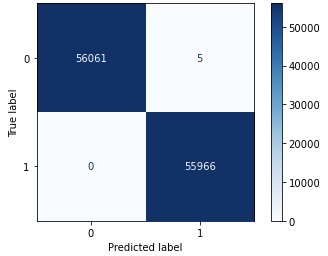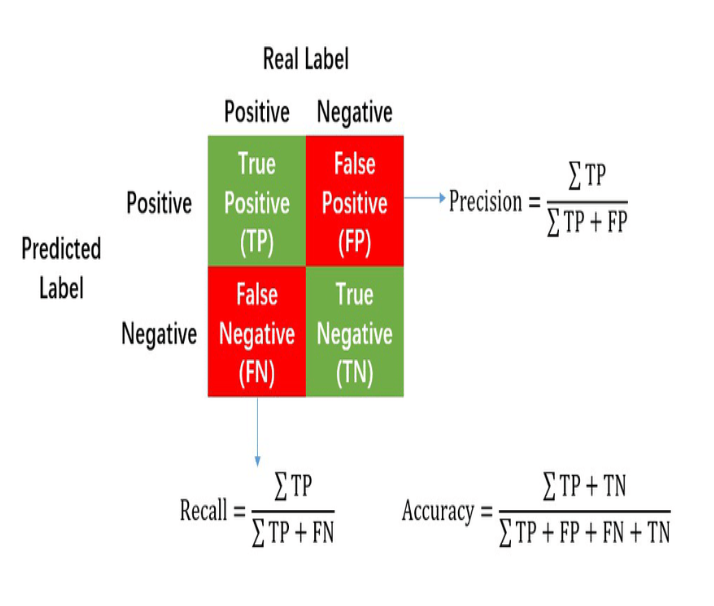

# (iv.) a discussion of to what extent the software/experiments were successful, and why.

The research was overwhelmingly successful by measuring whether the models we made could be used in real life. 
which measured by human guessed do not fraud transaction at all will have an accuracy of about 99.8272514369 percent.
In the first step, we used machine learning to predict 9 models, each model using 3 scalars: min_max_scalar,robust_scalar,standard_scalar.
This resulted in a total of 27 models, with 14 models outperforming humans.
in the second step, We optimize the model to increase accuracy by improving the parameters even further. when we train a model again. 
We have selected the best parameters and scalar of each model for a total of 9 models. which outperforms the human prediction of 4 models.
finally, we use Deep Learning model with Convolution neural network 1 model, which is more efficient than human prediction.
With all of the above, we can clearly see that there are 19 models that are accurate enough to be used in real life.
The most accurate model was Random Forest, which used the best parameters and scalar with an accuracy of 0.999911 percent and a standard deviation of 0.000050 percent.
from the comparison of a test set with a total of 112032 transactions, only 5 transactions have errors.
while if humans predict there will be a transaction error is approximately 194 transaction[112032-(112032*99.8272514369/100)].
That makes a very accurate model that can be used in real life because it is much more accurate than humans.


# Reference

[1] Leite, R. A., Gschwandtner, T., Miksch, S., Kriglstein, S., Pohl, M., Gstrein, E., & Kuntner, J. (2017). Eva: Visual analytics to identify fraudulent events. IEEE transactions on visualization and computer graphics, 24(1), 330-339.

[2] MA, Jun & Ding, Yuexiong & Cheng, Jack & Tan, Yi & Gan, Vincent & ZHANG, Jingcheng. (2019). Analyzing the Leading Causes of Traffic Fatalities Using XGBoost and Grid-Based Analysis: A City Management Perspective. IEEE Access. PP. 1-1. 10.1109/ACCESS.2019.2946401.

[3] MACHINE LEARNING GROUP - ULB. (2018). Credit Card Fraud Detection,
  Version 3. from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

[4] Agarap, A. F. (2018). Deep learning using rectified linear units (relu). arXiv preprint arXiv:1803.08375.

[5] Jiang, H. J., You, Z. H., & Huang, Y. A. (2019). Predicting drug− disease associations via sigmoid kernel-based convolutional neural networks. Journal of translational medicine, 17(1), 1-11.

